# Taller de Investigacion 
## Correlacion de curvas de luz en optico y rayos gamma para BL Lacs
 Javier Silva-Farfán, Walter Max-Moerbeck



Los blazares son los emisores de rayos gamma de alta energía (HE) y muy alta energía (VHE) más numerosos, en el caso de objetos BL Lac determinar el redshift de éstos objetos es extremadamente difícil, debido a sus espectros que presentan muy pocas o nulas lineas de absorción o emisión. De hecho, a día de hoy, redshift espectroscópico ha sido medido solo el 50% de los blazares aproximadamente.


Cuando se ponga en marcha el Cherenkov Telescope Array(CTA), se detectarán varios cientos de nuevos blazares. Por lo que sera necesario encontrar una forma de medir el redshift para blazares, para poder estudiar distintos procesos físicos en torno a estos objetos.


Una forma de poder medir el redshift de un blazar es tomar la medición en el momento que el objeto se encuentra en un mínimo de intensidad en el óptico, esto significa que el jet es menos luminoso, lo que hace que al tomar el espectro se pueda detectar de mejor manera la galaxia (sin considerar el jet), sin que el jet domine el espectro. 

P. Goldoni et al. 2021  https://ui.adsabs.harvard.edu/abs/2021A&A...650A.106G/abstract

La motivación de este proyecto es encontrar correlación entre las curvas de luz de blazares en rayos gamma con óptico, así poder ocupar rayos gamma como un proxy de optico para cuando se realicen campañas de medicion de redshift para BL Lac.

Para esto se ocuparan datos de Fermi Large Area Telescope(Fermi LAT), en gamma y datos de ZTF+Catalina en óptico.

Este notebook es un resumen de lo realizado durante Taller de investigacion 2021A, y se divide en las siguientes partes:

# Tabla de contenidos:
* [Como obtener curvas de luz en optico para Blazares de 3FHL](#optico)

    *  [ZTF](#ztf)
    * [CATALINA](#catalina)
    * [PanSTARRS](#panstarrs)
    
    
* [Descargar datos de Fermi](#fermidownload)
* [Construcción de curvas de luz en gamma ocupando fermipy + Correlacion](#fermilc)
* [Analisis de curvas de luz (bins de 2 meses) en el catalogo 4FGL](#catalogo)
* [Instalacion Fermipy](#instalacion)

Primero importamos paquetes utiles y cargamos la tabla con los objetos de interes

In [3]:
#importamos paquetes utiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import astropy.units as u
from astropy import coordinates
from astropy.time import Time
from astropy.table import Table, Column
from astropy.coordinates import Distance
from astropy.cosmology import WMAP7

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [6]:
#cargamos los objetos que interesan monitorear
df = pd.read_excel("photometric-monitoring.xlsx")
df

,3FHL_Name,3FHL_CLASS,3FHL_RAJ2000,3FHL_DEJ2000,Assoc1_Name,z_for_MC,z_LL,z_quality_comment,Livetime,Extension_Flag,High_S/N_spectra,Comment,Action,Spectro-Observations,Imaging-Observations
0,3FHL J0022.1-1855,bll,5.525983,-18.917013,1RXS J002209.2-185,0.774,True,NaN,20.0,N,Y?,z>0.774 Keck Shaw et al. 13 spectrum not in ar...,Spectroscopy in photometric minimum,NaN,NaN
1,3FHL J0033.5-1921,bll,8.392931,-19.357483,KUV 00311-1938,0.506,True,Clear MgII absorber,1.0,N,Y,Pita et al. 14,Spectroscopy in photometric minimum,NaN,NaN
2,3FHL J0035.2+1514,bll,8.817282,15.243119,RX J0035.2+1515,0.300,False,NaN,13.0,N,Y,"Paiano et al. 17, SDSS",Spectroscopy in photometric minimum,NaN,NaN
3,3FHL J0035.9+5950,bll,8.978161,59.835045,1ES 0033+595,0.300,False,Tentative redshift ?,1.0,NP,Y,"z=0.467 Tentative Paiano et al. 17, Nilsson et...",Spectroscopy in photometric minimum,NaN,NaN
4,3FHL J0120.4-2701,bll,20.115040,-27.027128,PKS 0118-272,0.558,True,NaN,4.0,N,Y,"Deep UVES spectra, HST imaging",Spectroscopy in photometric minimum,NaN,NaN
5,3FHL J0136.5+3906,bll,24.139187,39.101215,B3 0133+388,0.300,False,NaN,1.0,NP,Y,"Several high S/N spectra, no result",Spectroscopy in photometric minimum,NaN,NaN
6,3FHL J0211.2+1051,BLL,32.814346,10.858768,MG1 J021114+1051,0.300,False,NaN,4.0,YP,Y,Extended Meisner & Romani 2010,Spectroscopy in photometric minimum,NaN,NaN
7,3FHL J0222.6+4302,BLL,35.666264,43.034084,3C 66A,0.334,True,HST Ly alpha abs.+cluster,1.0,NP,Y,"Cluster z=0.34, Torres-Zafra et al. 18, Stadni...",Spectroscopy in photometric minimum,NaN,NaN
8,3FHL J0334.2-3726,bll,53.569492,-37.444336,PMN J0334-3725,0.300,False,NaN,16.0,n,Y,Shaw et al. 13 VLT spectrum,Spectroscopy in photometric minimum,NaN,NaN
9,3FHL J0449.4-4350,bll,72.361565,-43.833763,PKS 0447-439,0.300,False,Possible cluster,1.0,n,Y,"Cluster z=0.343, Muriel et al. 15",Spectroscopy in photometric minimum,NaN,NaN


In [7]:
#vemos las columnas del df
df.columns

Index(['3FHL_Name', '3FHL_CLASS', '3FHL_RAJ2000', '3FHL_DEJ2000',
       'Assoc1_Name', 'z_for_MC', 'z_LL', 'z_quality_comment', 'Livetime',
       'Extension_Flag', 'High_S/N_spectra', 'Comment', 'Action',
       'Spectro-Observations', 'Imaging-Observations'],
      dtype='object')

# Curvas de luz en optico <a class="anchor" id="optico"></a>
## Datos en optico ZTF() <a class="anchor" id="ztf"></a>
Ahora, queremos buscar datos en opticos para estos objetos, la primera opcion sera ver las alertas de ZTF

In [8]:
#si no esta instalado este paquete se puede instalar descomentando la siguiente linea
#!pip install alerce
from alerce.core import Alerce
client = Alerce()

In [9]:
#nos interesa hacer un query de objetos asi que podemos ver mas info sobre que hace el metodo query_objects
help(client.query_objects)

Help on method query_objects in module alerce.search:

query_objects(format='pandas', index=None, sort=None, **kwargs) method of alerce.core.Alerce instance
    Gets a list of objects filtered by specified parameters.
    It is strongly advised to look at the documentation of `ALERCE ZTF API`_
    
    Parameters
    ----------
    format : str
        Return format. Can be one of 'pandas' | 'votable' | 'json'
    index : str
        Name of the column to use as index when format is 'pandas'
    sort : str
        Name of the column to sort when format is 'pandas'
    
    **kwargs
        Keyword arguments. Each argument can be one of the `ALERCE ZTF API`_
        object query parameters.
    
        - classifier : str
            classifier name
        - class_name : str
            class name
        - ndet : int[]
            Range of detections.
        - probability : float
            Minimum probability.
        - firstmjd : float[]
            First detection date range in m

In [10]:
#hacemos un query haciendo una busqueda en cono en un radio de 20 arcseconds(puede ser menos) 
# para ver si hay un objeto detectado pro ZTF en esa vecindad

query_results = []

for i in range(len(df["3FHL_DEJ2000"])):
    ra = df["3FHL_RAJ2000"][i]
    dec = df["3FHL_DEJ2000"][i]
    query_results.append(client.query_objects(ra=ra, dec=dec , radius=20))

In [11]:
#Podemos ver datos generales para un objeto detectado por las alertas de ZTF 
query_results[1]

,oid,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,...,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
0,ZTF18abtftkf,144,420,58333.418912,59443.460428,True,True,102,0.350603,0.296768,...,59443.460428,1074.132859,8.393232,-19.359211,0.000085,0.000082,None,None,None,correction_1.0.6


Ahora crearemos una funcion para que apartir del oid del objeto en las alertas de ZTF poder obtener la curva de luz de este.


Las siguientes dos funciones hara esto, pero la funcion mas importante es getLCdata

In [1]:
#Funcion que plotea la LC de un objeto dado el oid se ocupara dentro de la siguiente funcion

def plotLC(oid, LC_det, A=None, redshift=None):
    
    fig, ax = plt.subplots(figsize = (14, 8))
    labels = {1: 'g', 2: 'r'}
    colors = {1: '#56E03A', 2: '#D42F4B'}
    markers = {1: 'o', 2: 's'}
    
    # distmod: distance modulus, reftime: reference time
    if redshift is not None:
        distmod = float(Distance(z=redshift, cosmology=WMAP7).distmod / u.mag)
        reftime = LC_det.mjd.min()
    else:
        distmod = 0
        reftime = 0
        redshift = 0
        
    # loop the passbands
    for fid in [1, 2]:
        
        # galactic extinction in the given band
        if A is not None:
            A_fid = A[labels[fid]]
        else:
            A_fid = 0

        # plot detections if available
        mask = LC_det.fid == fid
        if np.sum(mask) > 0:
            
            # change time to restframe days if redshift is not zero
            times = (LC_det[mask].mjd - reftime) / (1. + redshift)
            
            # note that the detections index is candid and that we are plotting the psf corrected magnitudes
            if A_fid != 0:
                # plot attenuated light curve with small alpha
                ax.errorbar(times, LC_det[mask].magpsf_corr - distmod, 
                    yerr = LC_det[mask].sigmapsf_corr_ext, c = colors[fid], fmt=markers[fid], label = labels[fid], alpha=0.1)
                # show dust and distance attenuation corrected light curve
                ax.errorbar(times, LC_det[mask].magpsf_corr - A_fid - distmod, 
                    yerr = LC_det[mask].sigmapsf_corr_ext, c = colors[fid], fmt=markers[fid], label = "%s (ext. corr.)" % labels[fid])
            else:
                # correct only for redshift
                ax.errorbar(times, LC_det[mask].magpsf_corr - distmod, 
                    yerr = LC_det[mask].sigmapsf_corr_ext - A_fid, c = colors[fid], fmt=markers[fid], label = labels[fid])
        
            
    # labels
    if A is not None and redshift != 0:
        ax.set_title("%s ($A_g=%.3f, A_r=%.3f$, z=%.4f)" % (oid, A["g"], A["r"], redshift))
    elif redshift != 0:
        ax.set_title("%s (z=%.4f)" % (oid, redshift))
    elif A is not None:
        ax.set_title("%s ($A_g=%.3f, A_r=%.3f$)" % (oid, A["g"], A["r"]))
    else:
        ax.set_title(oid)
        
    if redshift == 0:
        ax.set_xlabel("MJD")
        ax.set_ylabel("Apparent magnitude")
    else:
        ax.set_xlabel("Restframe time [days]")
        ax.set_ylabel("Absolute magnitude (no K-corr.)")
    ax.legend()
    ax.set_ylim(ax.get_ylim()[::-1])

In [13]:
#Funcion que busca los datos de la curva de luz de un objeto dado el oid, tambien plotea la LC si doLC=True
#basta con correr esta funcion con fetLCdata(oid, doLC=True), para obtener la data disponible del objeto y graficar su LC
def getLCdata(oid, doLC=False, doext=False, dostamp=False, doNED=False, doredshift=False):

    results = {"oid": oid}
    
    # query basic stats
    LC_stats = client.query_object(oid, format='pandas')
    results["stats"] = LC_stats
    
    # query detections
    LC_det = client.query_detections(oid, format='pandas')
    results["lc_det"] = LC_det
    
    # object coordinates
    co = coordinates.SkyCoord(ra=LC_stats.meanra[0], dec=LC_stats.meandec[0], unit=(u.deg, u.deg), frame='fk5')
    
    # get galactic extinction
    if doext:
        # Galactic extinction (use SFD = D.J. Schlegel, D.P. Finkbeiner, & M. Davis (1998, ApJ, 500, 525))
        table = IrsaDust.get_extinction_table(co)
        A = {"g": float(table[table["Filter_name"] == "SDSS g"]["A_SFD"]), "r": float(table[table["Filter_name"] == "SDSS r"]["A_SFD"])}
        results["attenuation"] = A

    # plot the LC
    if doLC:
        if doext:
            plotLC(oid, LC_det, A)
        else:
            plotLC(oid, LC_det)
            
    # find NED galaxies
    if doNED:
        Ned_table = Ned.query_region(co, radius=2.0 * u.arcsec, equinox='J2000.0')
        display(Ned_table)
        results["ned_table"] = Ned_table
        
        # save closest redshift if any
        df_ned = Ned_table.to_pandas()
        mask=df_ned.Redshift.notna()
        if mask.sum() > 0:
            results["redshift"] = df_ned.loc[df_ned.loc[mask].Separation.idxmin()].Redshift
            print("Redshift found: %s" % results["redshift"])
            
    # plot absolute value (without K-corrections)
    if doredshift:
        if type(doredshift) == float and doredshift > 0:
            results["redshift"] = doredshift
        if "redshift" in results.keys():
            if doext:
                plotLC(oid, LC_det, A, results["redshift"])
            else:
                plotLC(oid, LC_det, results["redshift"])            
    
    
    # show link
    display(HTML("<a href='http://alerce.online/object/%s' target=\"_blank\"> %s <a>" % (oid, oid)))
    
    # show the first image stamp
    if dostamp:
        candid = results["lc_det"].loc[results["lc_det"].has_stamp].candid.min()
        stamps = client.get_stamps(oid, candid)
        science, ref, difference = stamps[0].data, stamps[1].data, stamps[2].data
        fig, ax = plt.subplots(ncols=3, figsize=(12, 6))
        for idx, im in enumerate([np.log(science), np.log(ref), difference]):
            ax[idx].imshow(im, cmap='viridis') # Log scale for visualization
            ax[idx].axes.get_xaxis().set_visible(False)
            ax[idx].axes.get_yaxis().set_visible(False)
        ax[0].set_title("oid: %s, candid: %s (science, reference and difference)" % (oid, candid), loc='left')
        fig.subplots_adjust(wspace = 0, hspace = 0)
        
    # return data
    return results

Por ultimo vemos que objetos de nuestra mustra original tienen resultados en ZTF y graficamos la curva de luz de aquellos que tienen datos en ZTF

3FHL J0022.1-1855  no results
0    ZTF18abtftkf
Name: oid, dtype: object
3FHL J0033.5-1921 / KUV 00311-1938 results: 


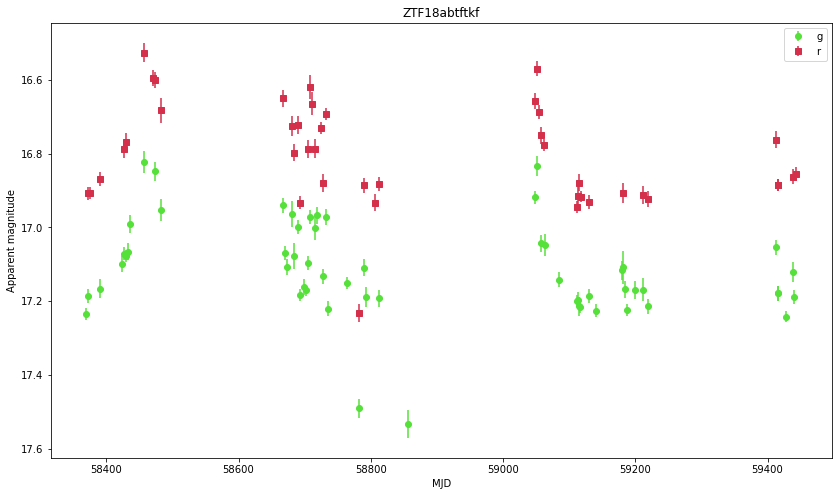

3FHL J0035.2+1514  no results
0    ZTF19abgzjrh
Name: oid, dtype: object
3FHL J0035.9+5950 / 1ES 0033+595 results: 


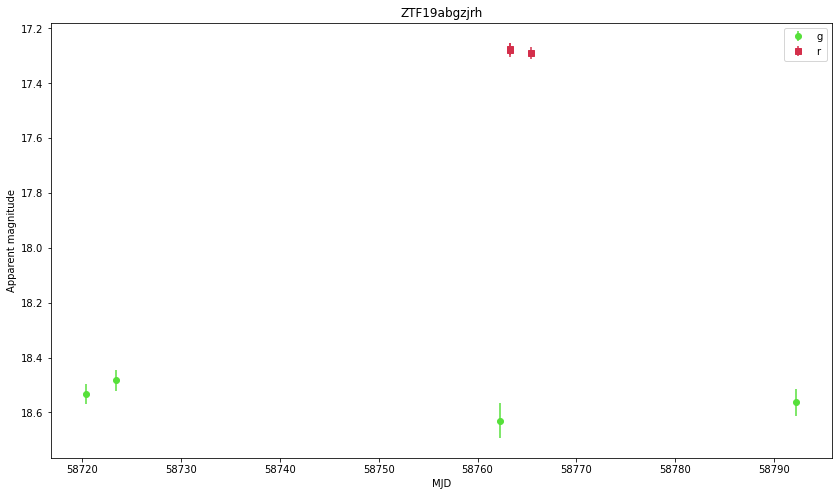

3FHL J0120.4-2701  no results
0    ZTF20abjmqnm
1    ZTF18achbdgm
Name: oid, dtype: object
3FHL J0136.5+3906 / B3 0133+388 results: 


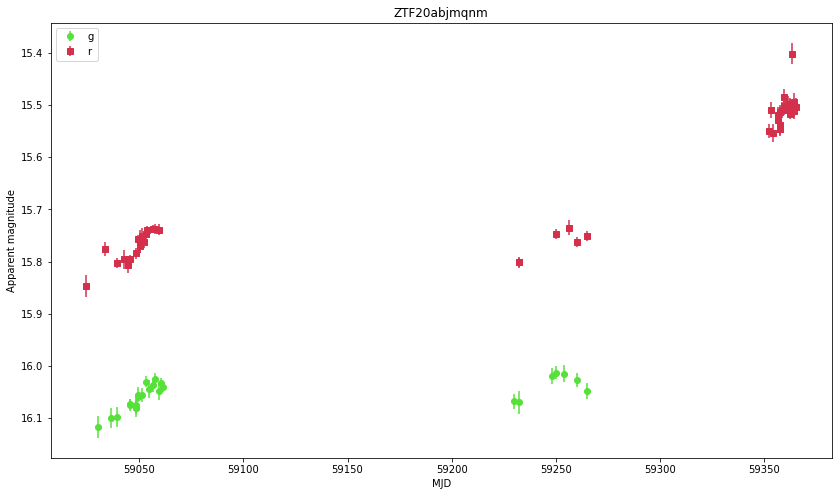

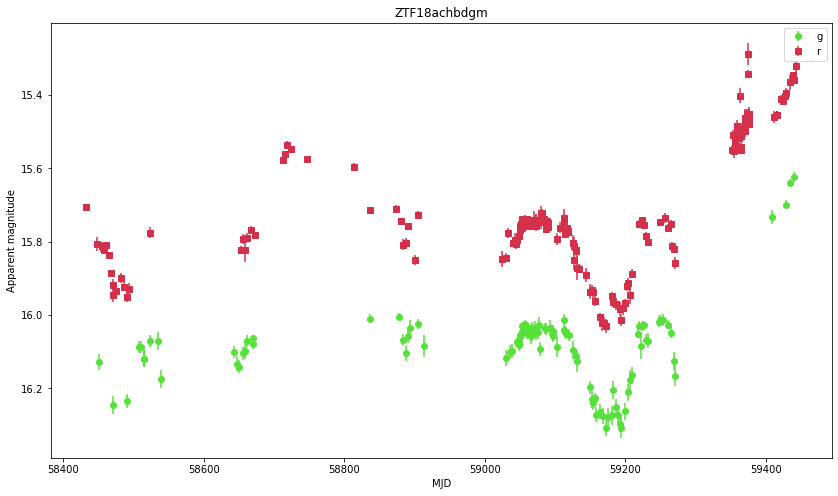

3FHL J0211.2+1051  no results
0    ZTF18aabezmq
Name: oid, dtype: object
3FHL J0222.6+4302 / 3C 66A results: 


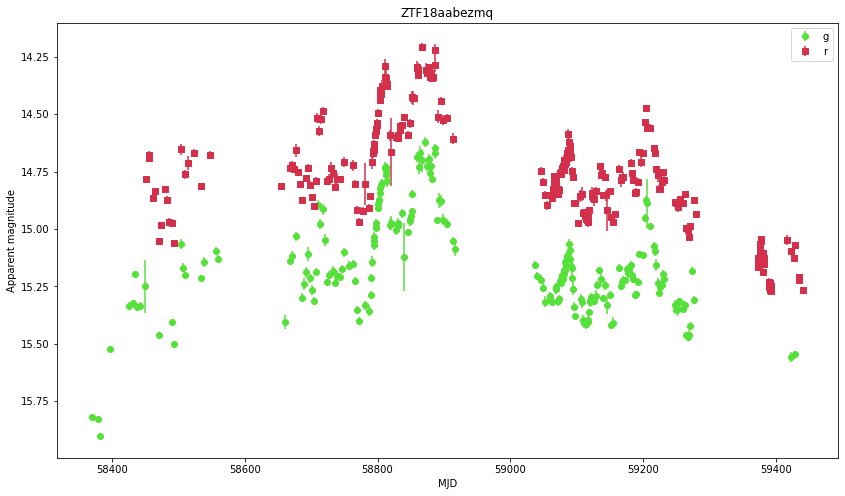

3FHL J0334.2-3726  no results
3FHL J0449.4-4350  no results
0    ZTF20aafanrl
1    ZTF17aacgwpq
Name: oid, dtype: object
3FHL J0521.7+2112 / TXS 0518+211 results: 


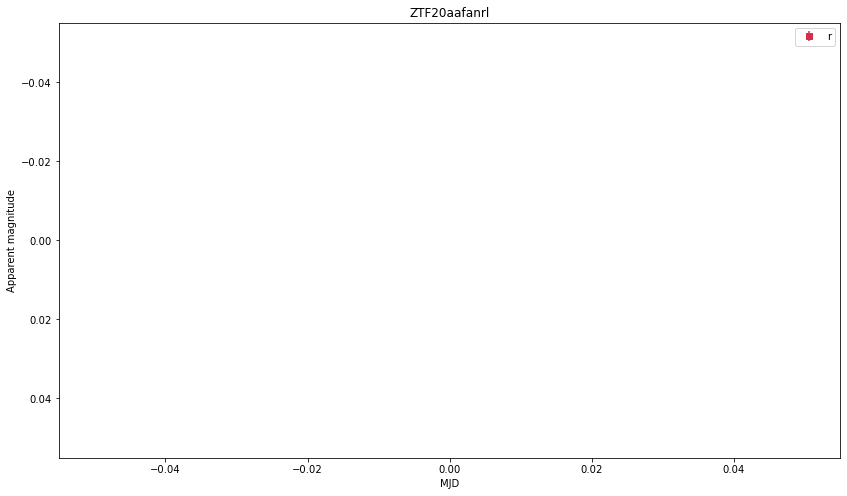

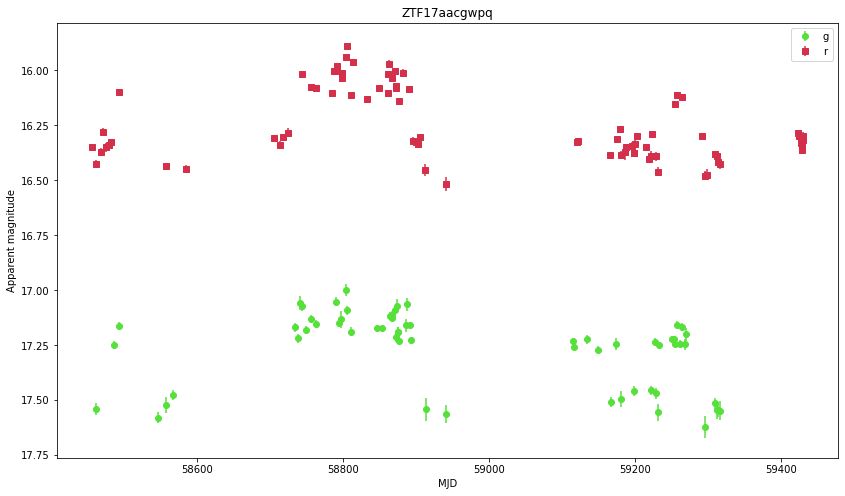

0    ZTF19abzmeot
1    ZTF18acwvxgw
2    ZTF21aagfgkl
Name: oid, dtype: object
3FHL J0650.7+2503 / 1ES 0647+250 results: 


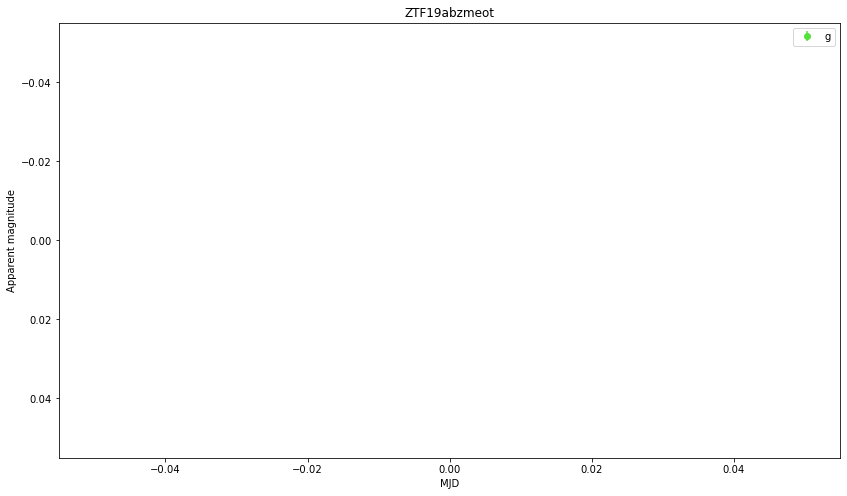

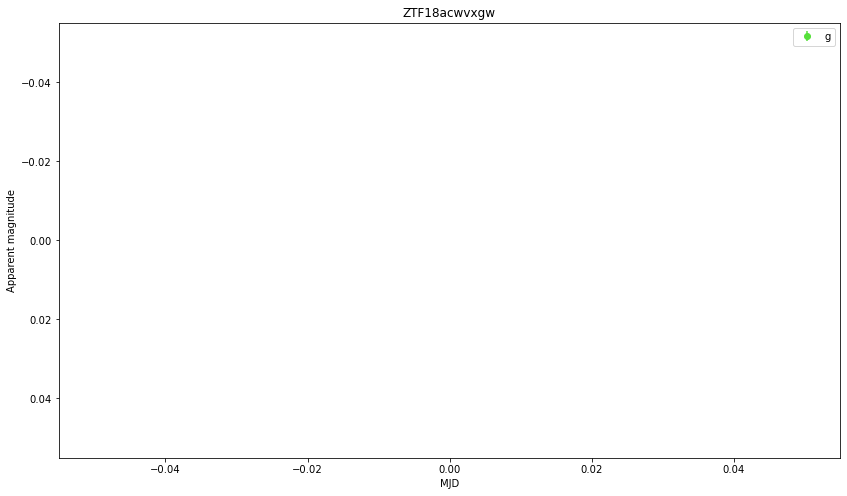

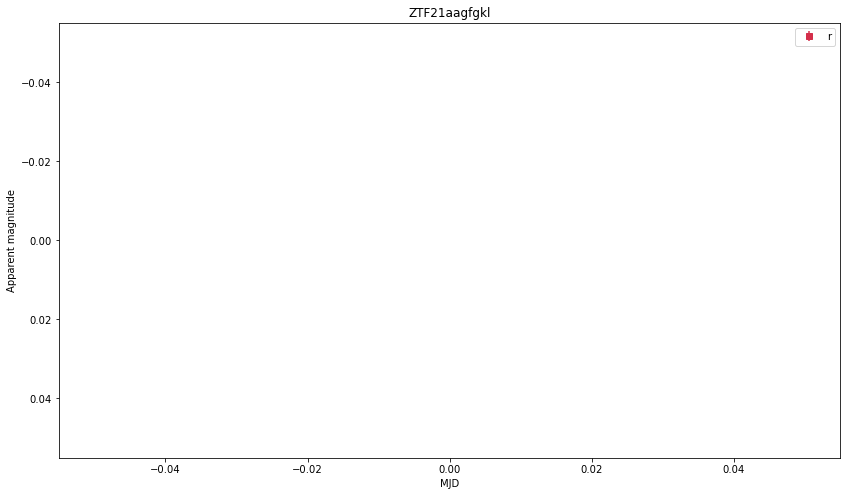

3FHL J0700.5-6611  no results
3FHL J0718.6-4319  no results
3FHL J0811.0-7529  no results
3FHL J0816.4-1311  no results
3FHL J0953.0-0840  no results
0    ZTF19aaoxfhu
Name: oid, dtype: object
3FHL J1022.7-0113 / RX J1022.7-0112 results: 


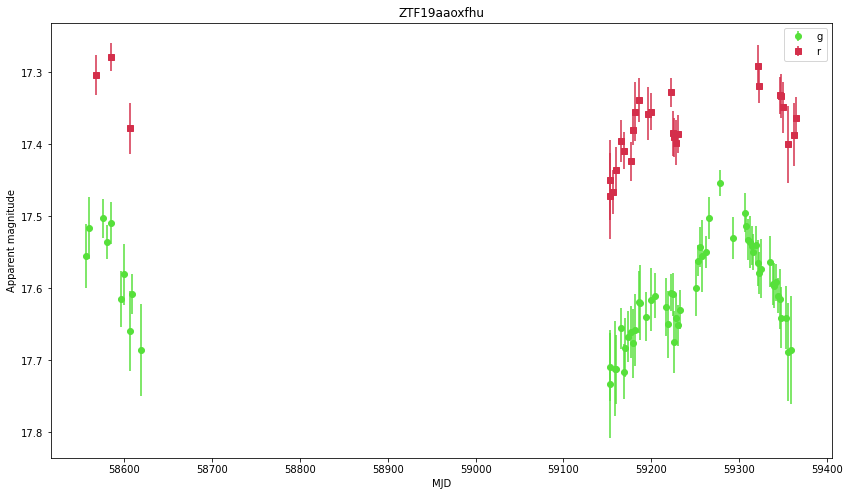

3FHL J1023.8-4335  no results
3FHL J1059.1-1134  no results
0    ZTF20aajbuuc
1    ZTF18aaifwpa
2    ZTF18acdvuby
3    ZTF18aahfflo
Name: oid, dtype: object
3FHL J1120.8+4212 / RBS 0970 results: 


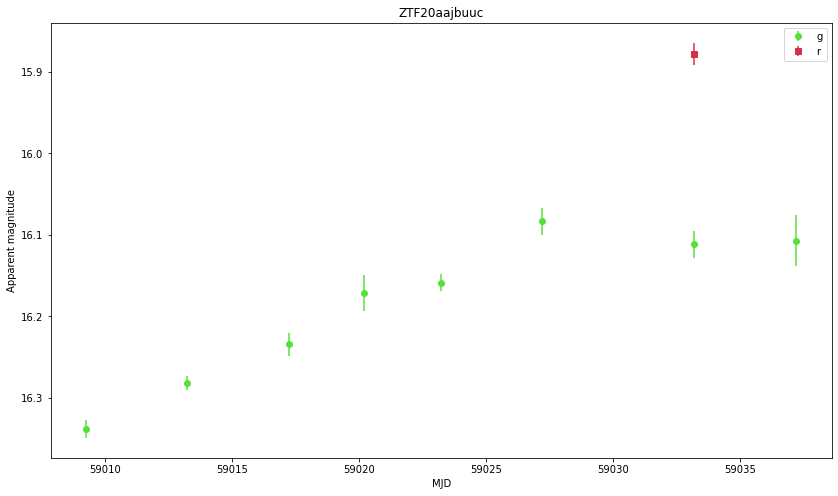

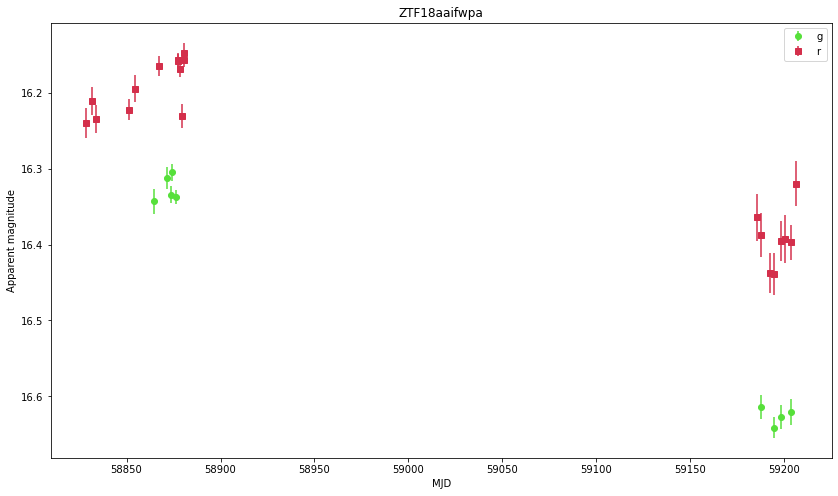

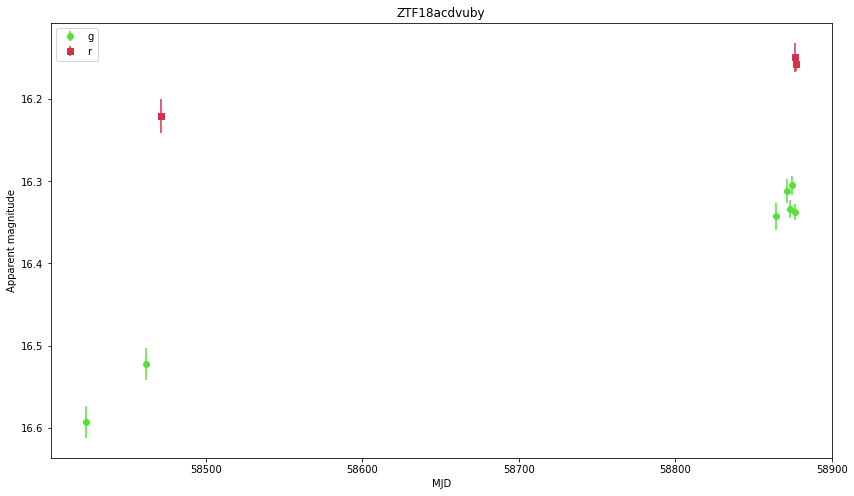

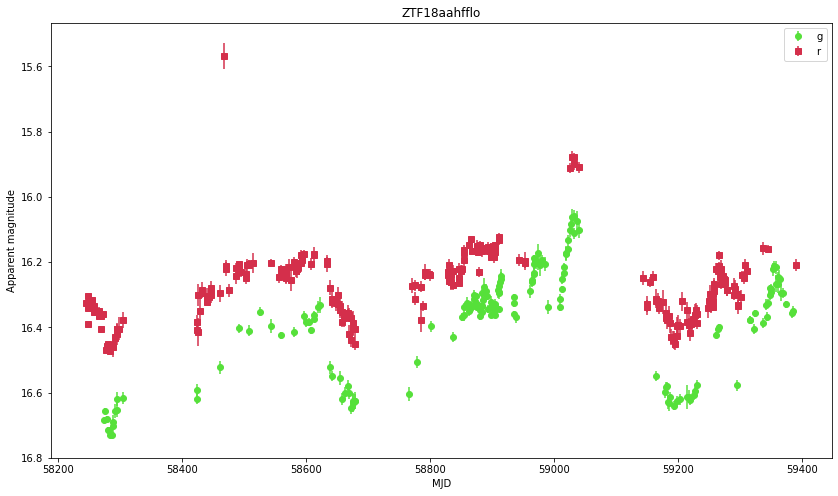

0    ZTF18aaaownr
1    ZTF19aaklsmy
Name: oid, dtype: object
3FHL J1248.3+5820 / PG 1246+586 results: 


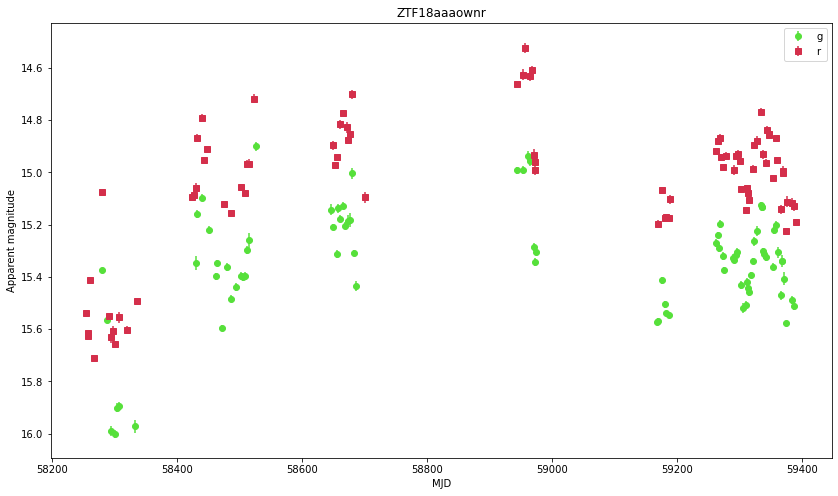

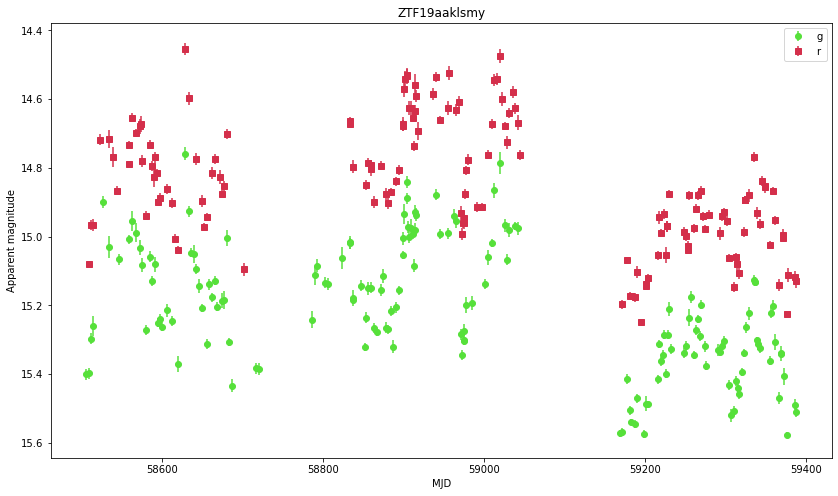

3FHL J1253.1+5300  no results
3FHL J1353.6-6640  no results
3FHL J1418.4-0233  no results
3FHL J1540.1+8154  no results
0    ZTF20aakzktc
1    ZTF18aaylblx
Name: oid, dtype: object
3FHL J1555.7+1111 / PG 1553+113 results: 


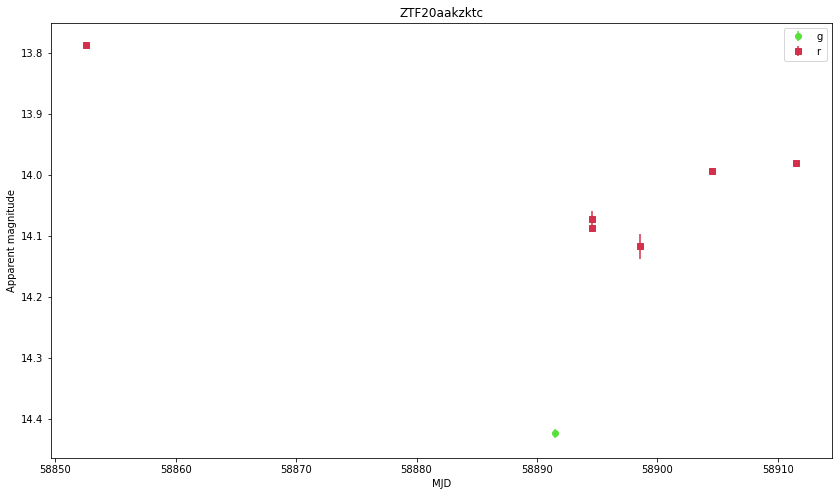

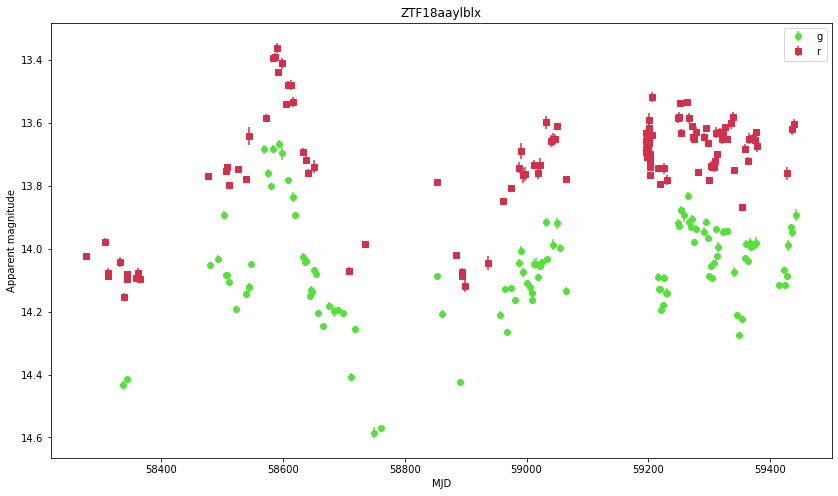

3FHL J1610.6-6649  no results
3FHL J1725.0+1152  no results
0    ZTF18aakyttg
Name: oid, dtype: object
3FHL J1754.1+3212 / RX J1754.1+3212 results: 


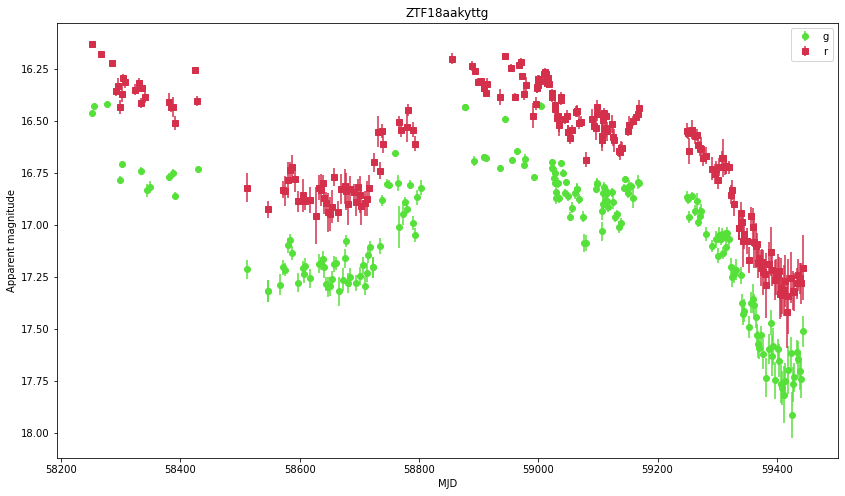

0    ZTF19aanvgnw
Name: oid, dtype: object
3FHL J1903.2+5540 / TXS 1902+556 results: 


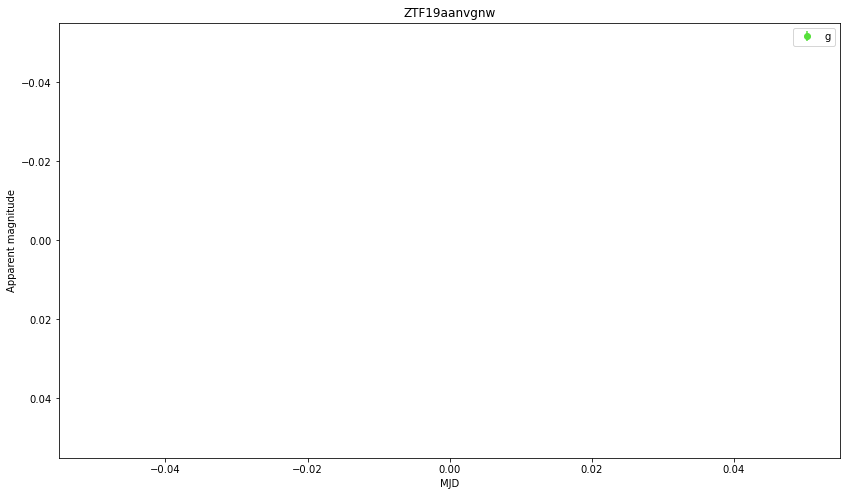

0    ZTF19aatuwxl
Name: oid, dtype: object
3FHL J1921.8-1607 / PMN J1921-1607 results: 


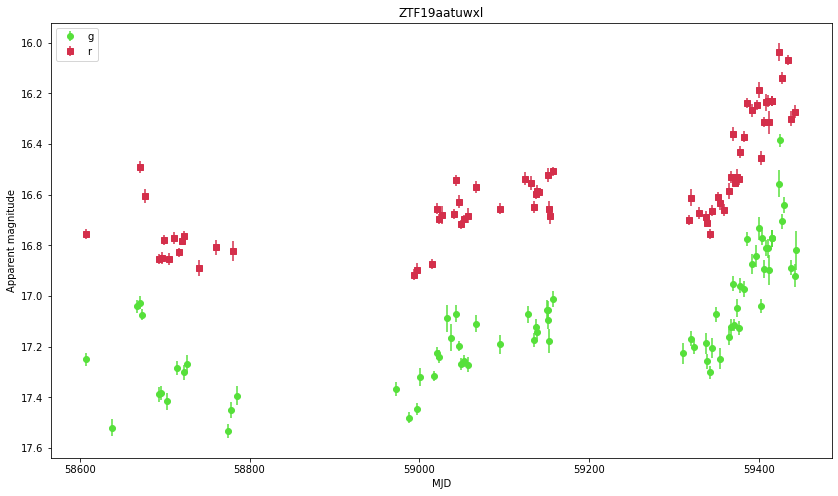

0    ZTF18acbwlfu
Name: oid, dtype: object
3FHL J1942.7+1033 / 1RXS J194246.3+103 results: 


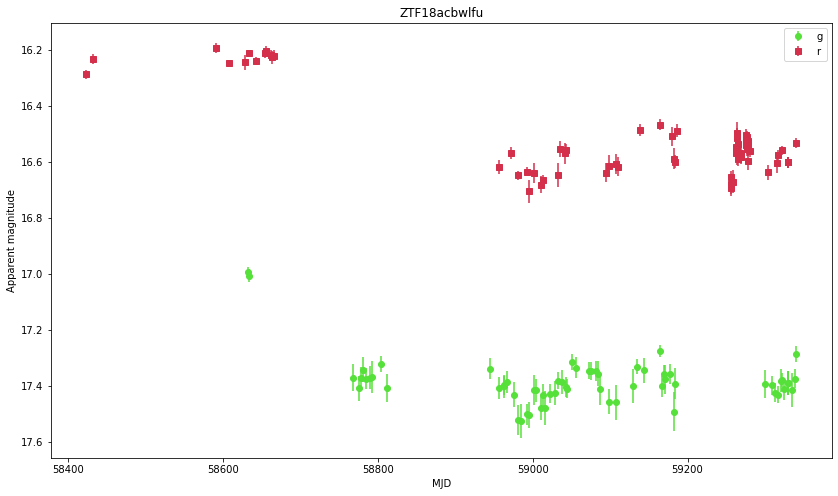

3FHL J1959.7-4725  no results
3FHL J2139.4-4234  no results
0    ZTF20acbleyh
1    ZTF20aazfhed
2    ZTF18abdeygo
Name: oid, dtype: object
3FHL J2243.9+2020 / RGB J2243+203 results: 


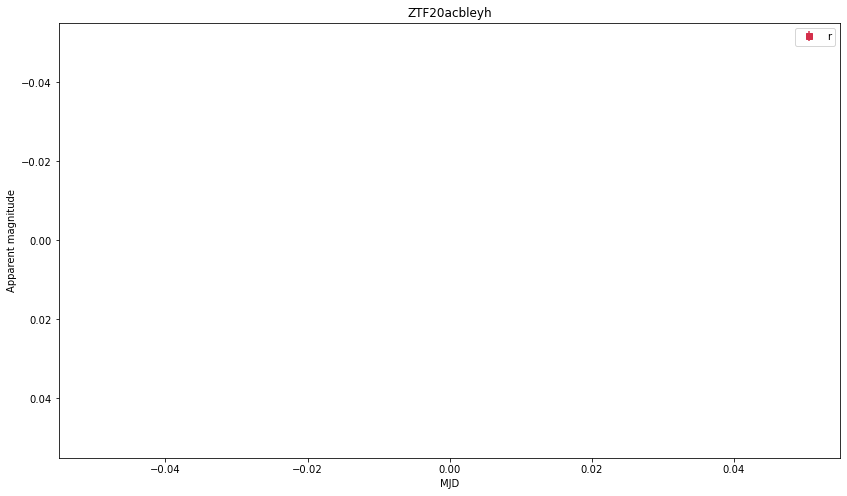

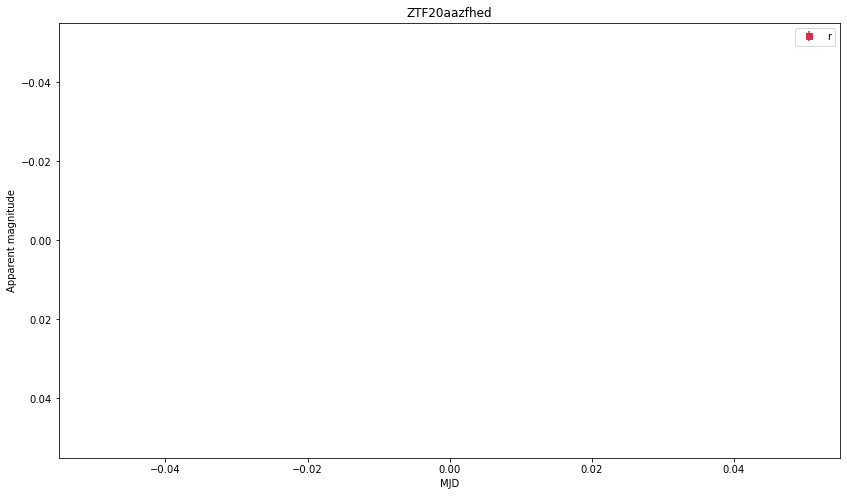

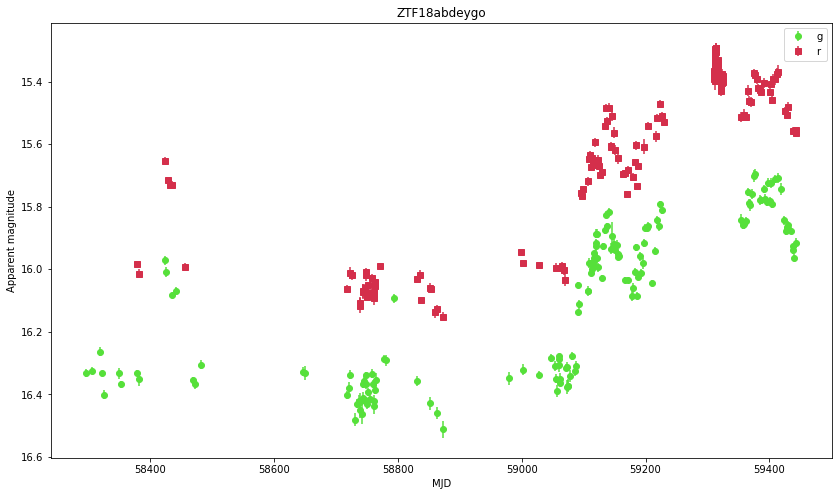

3FHL J2357.4-1717  no results
3FHL J0508.0+6737  no results
3FHL J0509.4+0542  no results
0    ZTF21abggfzc
Name: oid, dtype: object
3FHL J1427.0+2348 / PKS 1424+240 results: 


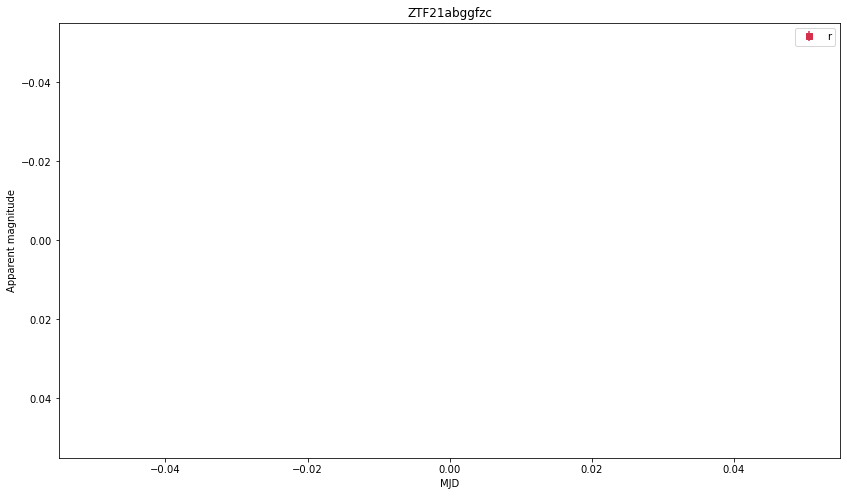

In [14]:
for i in range(len(df["3FHL_Name"])):
    result = query_results[i]
    try:
        a = result.oid
        print(df["3FHL_Name"][i] + " / " + df["Assoc1_Name"][i], "results: ")
        print(result.oid)
        for oid in query_results[i].oid.unique():
            getLCdata(oid, doLC=True);
            plt.show()
    except:
        print(df["3FHL_Name"][i], " no results")

## Datos en optico CSS <a class="anchor" id="catalina"></a>
La segunda opcion son datos del survey Catalina, Catalina de hecho provee una pagina en la que puedes ver la curvas de luz de blazares de Fermi http://nesssi.cacr.caltech.edu/catalina/Blazars/Blazar.html#table107.

Tambien puedes buscar por:

- Conesearch de un objeto http://nunuku.caltech.edu/cgi-bin/getcssconedb_release_img.cgi
- Multiples objetos http://nesssi.cacr.caltech.edu/cgi-bin/getmulticonedb_release2.cgi
- O por nombre del objeto http://nunuku.caltech.edu/cgi-bin/getcssconedbid_release2.cgi

## Datos en optico PanSTARRS <a class="anchor" id="panstarrs"></a>
Para ocupar datos de PanSTARRS ocupe partes de este codigo que proveen con varios ejemplos de como bajar datos
https://ps1images.stsci.edu/ps1_dr2_api.html, no lo puse en el notebook porque son demasiadas lineas de codigo y este notebook quedaria muy largo

# Descargar datos de Fermi <a class="anchor" id="fermidownload"></a>
Para correr estas celdas es necesario instalar fermipy y abrir esta celda dentro del ambiente de fermipy, como se especifica en la ultima seccion de este notebook

In [ ]:
import os
#Ocupamos este df que consiste en relacionar los nombres del csv que nos pasaste con los de 4FGL
df = pd.read_csv("3LAC_clean_95perc_xmatch.csv")

#agrego una columna con los nombres sin identar para trabajar mas facil con carpetas
name_noident = []
for name in df["4FGL_name"]:
    name_noident.append(name.replace(" ", ""))
    
df["Name_Noident"] = name_noident

In [ ]:
#creamos los directorios donde guardaremos los datos
for name in df["Name_Noident"]:
    try:
        os.mkdir(name)
        #print("Directory '%s' created" %name)
    except:
        pass

## Query

Para hacer un query de datos de fermi de forma simple y programatica ocupamos la libreria astroquery.

Basta que la funcion fermi.FermiLAT.query_object() le entreguemos las coordenadas, los rangos de energia en Mev y los limites de las fechas en un string como se muestra en el ejemplo de la celda de abajo 

In [ ]:
#Ocupamos astroquery para hacer el query en Fermi
from astroquery import fermi


#guardaremos los link con los resultado del query en las carpetas creadas anteriormente
for i in range(len(df["Name_Noident"])):
    #ocupamos el nombre para buscar la carpeta
    name = df["Name_Noident"][i]
    #coordenadas
    ra = df["4FGLDR2_RAJ2000"][i]
    dec = df["4FGLDR2_DEJ2000"][i]
    coords = str(ra) + "," + str(dec)
    #query
    result = fermi.FermiLAT.query_object(coords, energyrange_MeV='1000, 300000',
                                    obsdates='2008-08-05 00:00:00, 2020-12-30 00:00:00')
    #guarda un archuvo de texto con los resultados del query 
    np.savetxt(name+"/result.txt", result, delimiter=" ", newline = "\n", fmt="%s")

In [ ]:
#Ahora bajaremos los datos
import wget

#con esto se bajan datos para todos las fuentes de df
#no baja los archivos spacecraft pero basta con bajar cualquiera de algun archivo results.txt
for name in df["Name_Noident"]:
    print("----------------------")
    print(name)
    with open(name+"/result.txt") as f:
        lines = f.readlines()
        for line in lines:
            #print(line[:-1])
            if "SC" in line:
                #print("spacecraft:"+ line)
                pass
            if "PH" in line:
                print("Downloading: " + line[:-1])
                wget.download(line[:-1], out=name)
                f.close()

# Curvas de luz con fermipy <a class="anchor" id="fermilc"></a>

Dado que ya bajamos los datos de Fermi, se presentara el procedimiento por el cual se construyen curvas de luz ocupando fermipy para esto se necesita una archivo config.yaml, este proceso es lento y genera varios archivos que ocupan harto espacio 

El ejemplo se basara en el objeto RBS 0970

In [ ]:
from fermipy.gtanalysis import GTAnalysis
gta = GTAnalysis('config.yaml',logging={'verbosity': 3})
matplotlib.interactive(True)

La siguiente linea es la que mas se demora con la que empieza a crear la LC a partir del binning

In [ ]:
gta.setup()

In [ ]:
#esta linea en teoria es opcional, pero a veces la LC no converge si no la haces
gta.optimize()

In [ ]:
#Podemos obtener detalles especificos de la fuente de interes con esta linea 

print(gta.roi['RBS 0970'])#need to change

## Likelihood fitting


In [ ]:
#con esta linea liberamos la fuente que nos interesa 

gta.free_source('RBS 0970')

In [ ]:
#Ahora, realmente hacemos el ajuste. El software hace todo lo posible para que el ajuste converja ejecutando el ajuste varias veces.

fit_results = gta.fit()

In [ ]:
#You can then save the state of the roi to an output file for reference later. The write_roi function does this. 
#The first argument is a string that will be prepended to the names of the output files generated by this method.

gta.write_roi('fit0')#,make_plots=True)

### Light Curve

In [ ]:
#Seleccionamos un binsize en este caso de 10 dias
binsize = 86400 * 10

lc = gta.lightcurve('RBS 0970', binsz=binsize, multithread=True, nthread=4)

#tambien puedes correr la linea anterior de la siguiente forma

#lc = gta.lightcurve('4FGL J1754.2+3212', binsz=bins, multithread=True, nthread=4)

#donde bins seria un array donde cada elemento es un borde de los bins, este fue el metodo que ocupamos 
#para poder correr en fuentes que no convergian en los bins con las fechas donde FermiLAT no estuvo en operacion

Por ultimo puedes guardar el resultado en un archivo pickle, este paso es super importante ya que si lo haces no tienes que volver a correr el codigo, lo que demora harto, ademas podrias borrar todos los archivos generados anteriormente, pero tendrias la curva de luz guardada, con lo que liberaras espacio en el disco duro

In [ ]:
import pickle
a_file = open("lc.pkl", "wb")

pickle.dump(lc, a_file)

a_file.close()

# Cross correlation

Para hacer la correlacion cruzada necesitaremos el flujo en optico y en gamma para un objeto, ocuparemos como ejemplo el mismo objeto que antes RBS 0970

In [20]:
#Funciones para pasar de mag a flujo 

def mag2uJy(mag):
    return 10**((8.9 - mag) / 2.5) * 1e6

def emag2euJy(mag, emag):
    return (mag2uJy(mag - emag) - mag2uJy(mag))

In [2]:
#Aqui leemos los archivos que guardamos anteriormente cuando creamos las curvas de luz con fermipy

import pickle

gammalc1 = open("EX3/lc1.pkl", "rb")
gammalc2 = open("EX3/lc2.pkl", "rb")

lc1 = pickle.load(gammalc1)
lc2 = pickle.load(gammalc2)
#print(lc2)

In [15]:
#Ocuparemos los bins que tengan TS>4, se puede cmabiar esto cambiando el valor de n

n = 4
mask_ul1 = lc1["ts"] <= n
mask_det1 = lc1["ts"] > n

tmean1 = (lc1['tmin_mjd'] + lc1['tmax_mjd'])/2

mask_ul2 = lc2["ts"] <= n
mask_det2 = lc2["ts"] > n

tmean2 = (lc2['tmin_mjd'] + lc2['tmax_mjd'])/2

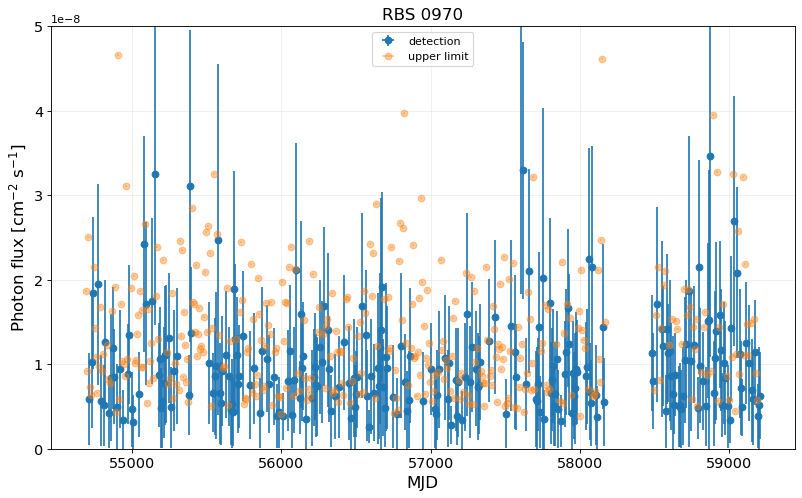

In [21]:
#Photon flux
plt.figure(figsize=(12, 7), dpi=80)

#detection
plt.errorbar(tmean1[mask_det1], lc1['flux'][mask_det1], yerr=lc1['flux_err'][mask_det1], xerr=7,
             linestyle='None', marker='o', label="detection")

#Upper limits
plt.errorbar(tmean1[mask_ul1], lc1['flux_ul95'][mask_ul1], xerr=7, linestyle='None', marker='o', 
             label="upper limit", alpha = 0.4)


#detection
plt.errorbar(tmean2[mask_det2], lc2['flux'][mask_det2], yerr=lc2['flux_err'][mask_det2], xerr=7,
             linestyle='None', marker='o', color='#1f77b4')#, label="detection")

#Upper limits
plt.errorbar(tmean2[mask_ul2], lc2['flux_ul95'][mask_ul2], xerr=7, linestyle='None', marker='o', 
             alpha=0.4, color="#ff7f0e") #label="upper limit", alpha = 0.4)


plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.title("RBS 0970", fontsize=15)
#plt.ylim(0, np.max(lc1['flux'][mask_det1])+ np.max(lc1['flux_err'][mask_det1]))
plt.xlabel('MJD', fontsize=15)
plt.ylabel('Photon flux [cm$^{-2}$ s$^{-1}$]', fontsize=15)
plt.legend()
plt.grid(alpha=0.2)
plt.ylim(0., 0.5*1e-7)

plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)

plt.show()

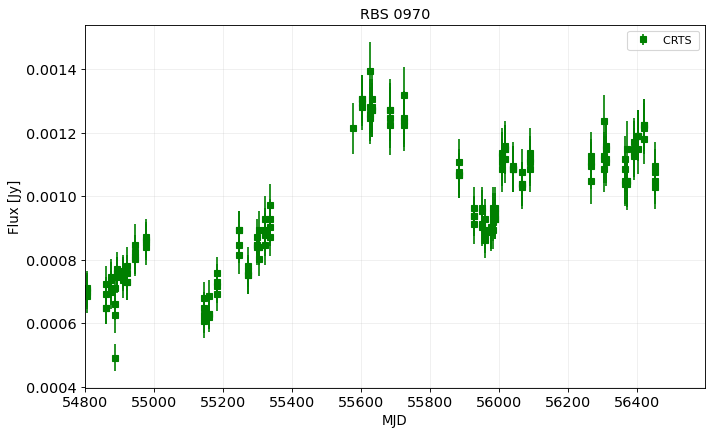

In [24]:
#Para este objeto hay datos en catalina 
cat = pd.read_csv("EX3/catalina.csv")

flux_cat= mag2uJy(cat["Mag"])
flux_e_cat  = emag2euJy(cat["Mag"], cat["Magerr"])

#graficamos
plt.figure(figsize=(10, 6), dpi=80)

plt.errorbar(cat["MJD"], flux_cat*1e-6,
                 yerr = flux_e_cat*1e-6, marker='s', c="g", label="CRTS ", linestyle="None")

#plt.ylim(0, np.max(lc['flux'][mask_det])+ np.max(lc['flux_err'][mask_det]))
plt.title("RBS 0970", fontsize=13)
plt.xlabel('MJD', fontsize=12)
plt.ylabel('Flux [Jy]', fontsize=12)
plt.legend()
plt.xlim(54800, None)
#plt.xlim(np.min(lc1['tmin_mjd']), np.max(cat["MJD"]))
#plt.ylim(0,1.15)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.grid(alpha=0.2)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

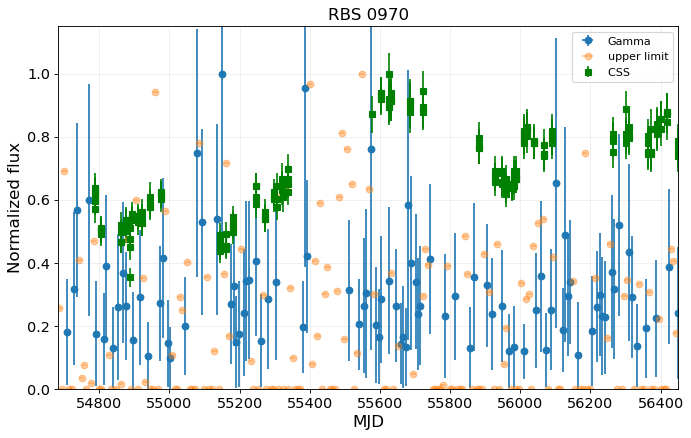

In [25]:
#Ploteamos esto encima de la curva en gamma

#Photon flux
plt.figure(figsize=(10, 6), dpi=80)

#detection
mask_dates = (tmean1>np.min(cat.MJD)) & (tmean1<np.max(cat.MJD))

plt.errorbar(tmean1[mask_det1], lc1['flux'][mask_det1]/np.max(lc1['flux'][mask_det1 & mask_dates]), 
             yerr=lc1['flux_err'][mask_det1]/np.max(lc1['flux'][mask_det1 & mask_dates]),
             xerr=7, linestyle='None', marker='o', label="Gamma")

#Upper limits
plt.errorbar(tmean1[mask_ul1], lc1['eflux'][mask_ul1]/np.max(lc1['eflux'][mask_ul1&mask_dates]), xerr=7, linestyle='None', marker='o', label="upper limit", alpha = 0.4)


labels = {1: 'g', 2: 'r'}
colors = {1: '#56E03A', 2: '#D42F4B'}
markers = {1: 'o', 2: 's'}
#for fid in [1, 2]:
 #   maskfid = opt["lc_det"]["fid"] == fid
  #  plt.errorbar(opt["lc_det"]["mjd"][maskfid], opt["lc_det"]["flux"][maskfid]/np.max(opt["lc_det"]["flux"][maskfid]),
   #              yerr = None, marker='s', c=colors[fid], label="ZTF "+ labels[fid], linestyle="-.")

plt.errorbar(cat["MJD"], flux_cat/np.max(flux_cat),
                 yerr = flux_e_cat/np.max(flux_cat), marker='s', c="g", label="CSS ", linestyle="None")

#plt.ylim(0, np.max(lc['flux'][mask_det])+ np.max(lc['flux_err'][mask_det]))
plt.title("RBS 0970", fontsize = 15)
plt.xlabel('MJD', fontsize =15)
plt.ylabel('Normalized flux', fontsize = 15)
plt.legend()
plt.xlim(np.min(lc1['tmin_mjd']), np.max(cat["MJD"]))
plt.ylim(0,1.15)
plt.grid(alpha=0.2)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)

In [33]:
#Obtenemos datos de ZTF

opt  = getLCdata("ZTF18aahfflo")# , doLC=True);

tmean = (lc2['tmin_mjd'] + lc2['tmax_mjd'])/2
#a flujo
flux = mag2uJy(opt["lc_det"].magpsf_corr)
flux_e = emag2euJy(opt["lc_det"].magpsf_corr, opt["lc_det"].sigmapsf)
opt["lc_det"]["flux"] = flux
opt["lc_det"]["flux_e"] = flux_e

mask_ul = lc2["ts"]<=n
mask_det = lc2["ts"]>n

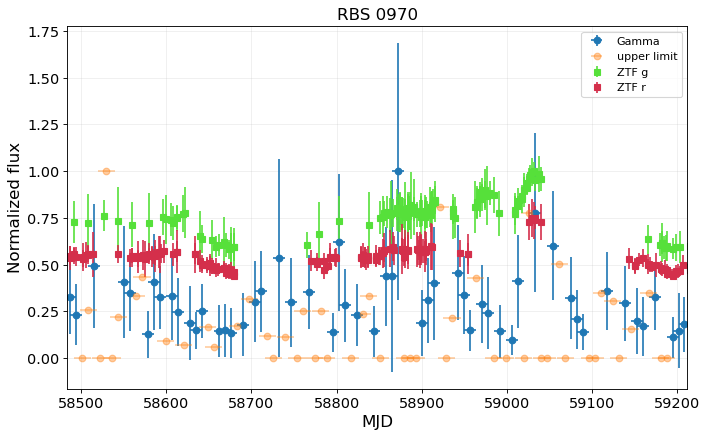

In [34]:
#Finalmente ploteamos los datos en ZTF encima de los de gamma

#Photon flux
plt.figure(figsize=(10, 6), dpi=80)

#detection
mask_dates = True #(tmean>np.min(opt["lc_det"].mjd)) & (tmean<np.max(opt["lc_det"].mjd))

plt.errorbar(tmean[mask_det], lc2['flux'][mask_det]/np.max(lc2['flux'][mask_det&mask_dates]), 
             yerr=lc2['flux_err'][mask_det]/np.max(lc2['flux'][mask_det&mask_dates]),
             xerr=7, linestyle='None', marker='o', label="Gamma")

#Upper limits
plt.errorbar(tmean[mask_ul], lc2['eflux'][mask_ul]/np.max(lc2['eflux'][mask_ul&mask_dates]), xerr=10, linestyle='None', marker='o', label="upper limit", alpha = 0.4)


labels = {1: 'g', 2: 'r'}
colors = {1: '#56E03A', 2: '#D42F4B'}
markers = {1: 'o', 2: 's'}
for fid in [1, 2]:
    maskfid = opt["lc_det"]["fid"] == fid
    plt.errorbar(opt["lc_det"]["mjd"][maskfid], opt["lc_det"]["flux"][maskfid]/np.max(opt["lc_det"]["flux"][maskfid]),
                 yerr = opt["lc_det"]["flux_e"][maskfid]/np.max(opt["lc_det"]["flux"][maskfid]), 
                 marker='s', c=colors[fid], label="ZTF "+ labels[fid], linestyle="None")

#plt.ylim(0, np.max(lc['flux'][mask_det])+ np.max(lc['flux_err'][mask_det]))
plt.title("RBS 0970", fontsize=15)
plt.xlabel('MJD', fontsize=15)
plt.ylabel('Normalized flux', fontsize=15)
plt.legend()
plt.grid(alpha=0.2)
plt.xlim(np.min(lc2['tmin_mjd']), np.max(lc2['tmax_mjd']))

plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.show()

Ahora construiremos un df de pandas con los datos que nos interesan de este objeto para Catalina y ZTF, asi podremos hacer la correlacion cruzada

In [36]:
RBS_ztf = {'flux_ztf': opt["lc_det"].flux*1e-6,'eflux_ztf': opt["lc_det"].flux_e*1e-6, 
         'mjd_ztf': opt["lc_det"].mjd, "fid": opt["lc_det"].fid}

RBS_fermi = {'flux_fermi':lc2['flux'][mask_det2], 'eflux_fermi': lc2['flux_err'][mask_det2], 
               'mjd_fermi': tmean2[mask_det2]}   

df_ztf = pd.DataFrame(RBS_ztf) 
df_fermi = pd.DataFrame(RBS_fermi)

#mask por filtros de ztf
maskg = df_ztf.fid == 1
maskr = df_ztf.fid == 2

Aqui hay un plot que muestra la correlacion ocupando tu codigo pero por algun motivo los valores alrededor de cero no son estimados bien

/home/javier/codigos/FermiLat/crossCorrLCCF_ave.py:145: RuntimeWarning: invalid value encountered in double_scalars
  r = sum((x - mean(x)) * (y - mean(y))) / n_elem /\


Text(0, 0.5, 'DCF')

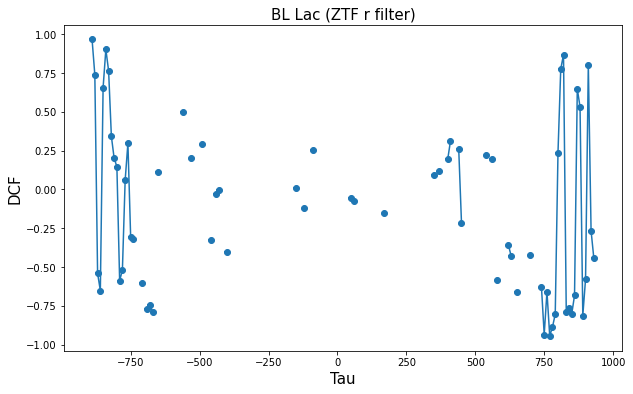

In [38]:
#Importamos el codigo 
from crossCorrLCCF_ave import *

#Aqui hacemos la correlacion
xcorr = crosscorr(df_ztf[maskg].mjd_ztf, df_ztf[maskg].flux_ztf, df_ztf[maskg].eflux_ztf,
          df_fermi.mjd_fermi, df_fermi.flux_fermi, df_fermi.eflux_fermi, 10)

plt.figure(figsize=(10,6))
#plt.plot(xcorr[0], xcorr[2], '.')

plt.errorbar(xcorr[0], xcorr[2], xerr=xcorr[1], yerr=xcorr[3], linestyle="-", marker="o")

plt.title("BL Lac (ZTF r filter)", fontsize=15)
plt.xlabel("Tau", fontsize=15)
plt.ylabel("DCF", fontsize=15)
#plt.xlim(-100, 100)

# Analisis del catalogo 4FGL <a class="anchor" id="catalogo"></a>

Por ultimo hacemos un analisis de los blazares que nos interesan en el catalog de FermiLAT para ver cuales son las chances de que detectemos estas fuentes haciendo la construccion de la curva de luz descrita anteriormente, para esto buscaremos nuestras fuentes de interes en el catalog y veremos sus curvas de luz y sus TS

In [40]:
#Leemos el catalogo
from astropy.io import fits

fgl = fits.open("gll_psc_v22.fit")
fgl.info()

Filename: gll_psc_v22.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  LAT_Point_Source_Catalog    1 BinTableHDU    482   5065R x 84C   [18A, E, E, E, E, E, E, E, E, E, E, I, 18A, E, E, E, E, E, E, 17A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 7E, 14E, 7E, 7E, E, E, E, E, E, E, D, E, 8E, 16E, 8E, E, E, E, E, E, E, D, E, 48E, 96E, 48E, 18A, 18A, 18A, 18A, 18A, A, 26A, 5A, 5A, 28A, 26A, E, E, D, D, E, I]   
  2  ExtendedSources    1 BinTableHDU     74   75R x 11C   [17A, E, E, E, E, 11A, E, E, E, 11A, 24A]   
  3  ROIs          1 BinTableHDU    119   1748R x 12C   [I, E, E, E, E, E, E, E, E, E, E, E]   
  4  Components    1 BinTableHDU     53   15R x 9C   [E, E, I, I, E, E, E, I, I]   
  5  EnergyBounds    1 BinTableHDU     75   19R x 10C   [E, E, E, I, I, E, E, E, I, I]   
  6  Hist_Start    1 BinTableHDU     42   9R x 1C   [D]   
  7  Hist2_Start    1 BinTableHDU     42   49R x 1C   [D]   
  

In [42]:
#Vemos las columnas del catalogo
fgl[1].columns

ColDefs(
    name = 'Source_Name'; format = '18A'
    name = 'RAJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLON'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLAT'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_SemiMajor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_SemiMinor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_PosAng'; format = 'E'; unit = 'deg'; disp = 'F8.3'
    name = 'Conf_95_SemiMajor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_95_SemiMinor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_95_PosAng'; format = 'E'; unit = 'deg'; disp = 'F8.3'
    name = 'ROI_num'; format = 'I'; null = 16959
    name = 'Extended_Source_Name'; format = '18A'
    name = 'Signif_Avg'; format = 'E'; disp = 'F8.3'
    name = 'Pivot_Energy'; format = 'E'; unit = 'MeV'; disp = 'F10.2'
    name = 'Flux1000'; format = 'E'; uni

In [43]:
#guardamos los tiempos de los bins que estan en la tabla Hist2_Start(son bins de 2 meses)
#hist2_satrt times
times = []
for i in fgl[7].data:
    times.append(i[0])
    
tmean = []
for i in range(len(times)-1):
    tmean.append( (times[i] + times[i+1])/2 )

Text(0.5, 1.0, '4FGL J0000.3-7355')

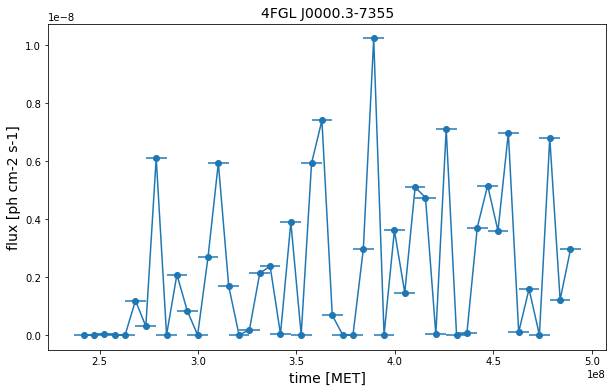

In [47]:
#Aqui ploteamos la curva de luz del primer objeto en el catalogo
plt.figure(figsize=(10,6))
plt.errorbar(tmean, fgl[1].data["Flux2_History"][0], xerr=5260000.0,marker='o' )
plt.xlabel("time [MET]", fontsize=14)
plt.ylabel("flux [ph cm-2 s-1]", fontsize=14)
plt.title(fgl[1].data["Source_Name"][0], fontsize=14)

In [51]:
#Aqui guardamos un par de columnas que nos interesan 
names_fgl = fgl[1].data["Source_Name"]
assoc_fhl = fgl[1].data["ASSOC_FHL"]
fluxes = fgl[1].data["Flux2_History"]
fluxes_e = fgl[1].data["Unc_Flux2_History"]
source_type = fgl[1].data["ASSOC1"]
ts = fgl[1].data["Sqrt_TS2_History"]

In [52]:
#Guardamos los indices en el catalogo de las fuentes a monitorear 
indexs = []
for name in df["3FHL_Name"]:
    index = np.where(name == assoc_fhl)[0][0]
    indexs.append(index)

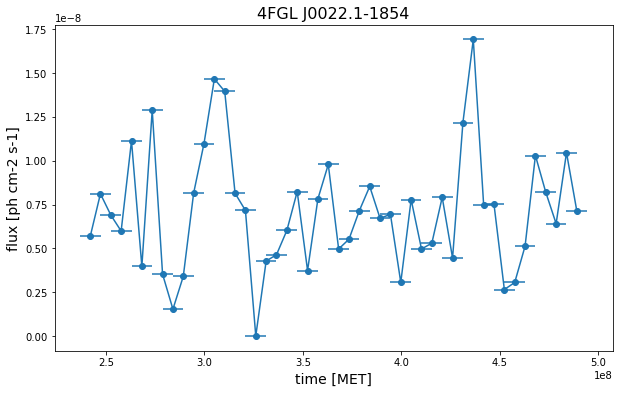

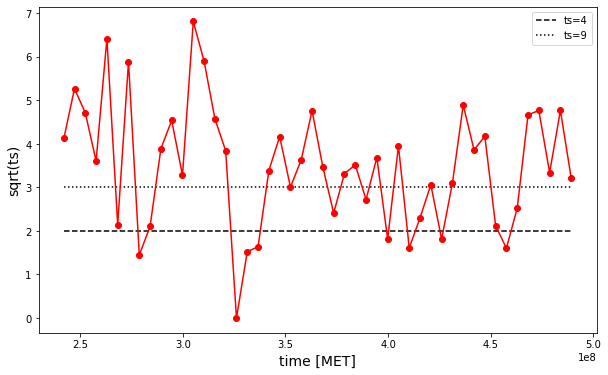

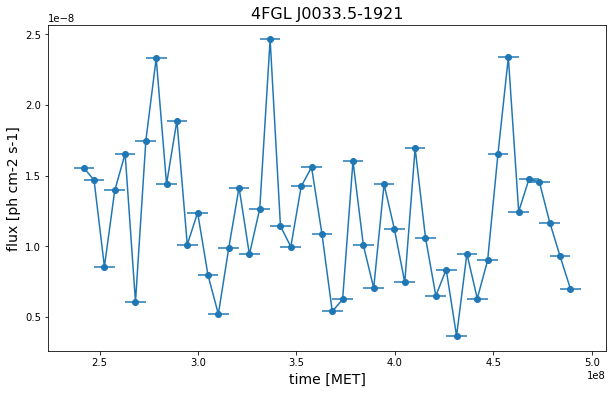

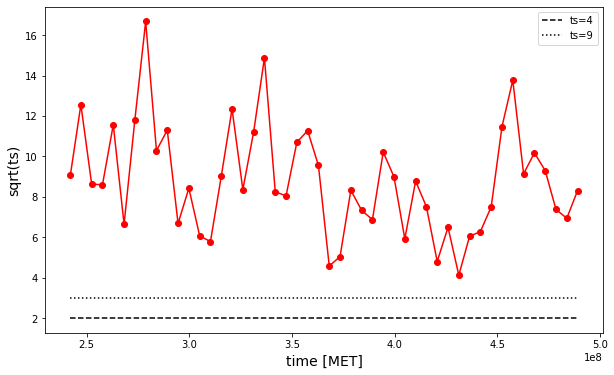

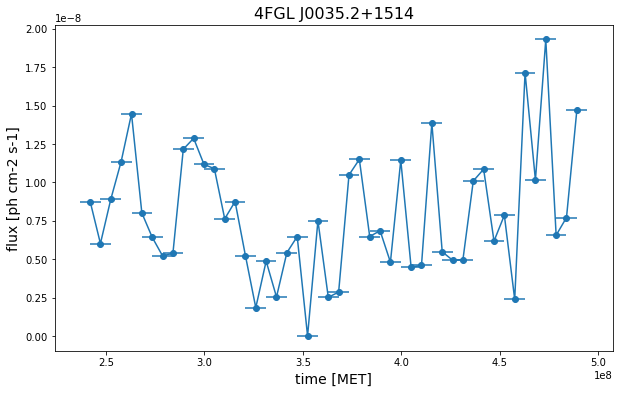

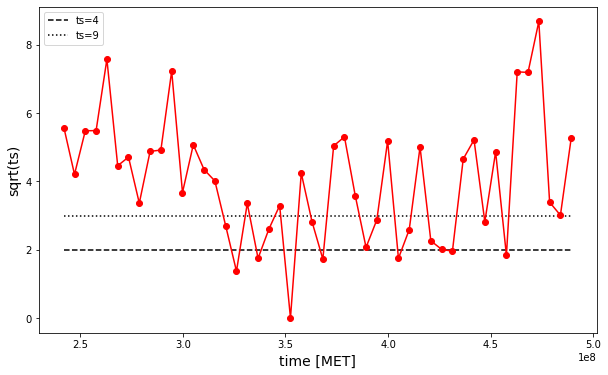

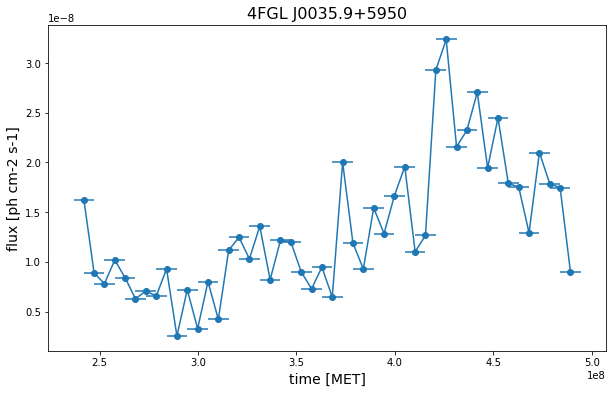

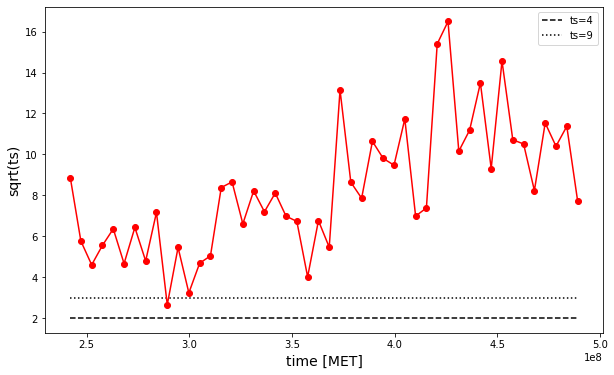

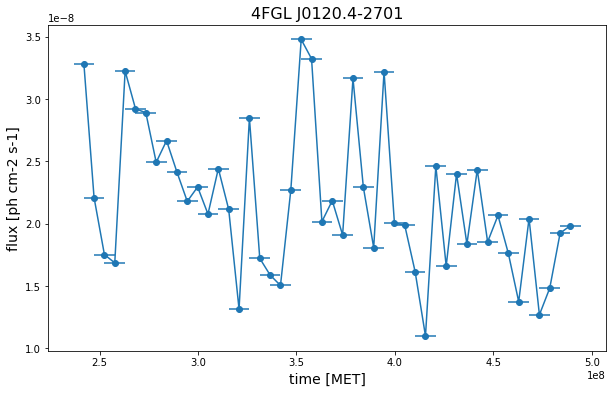

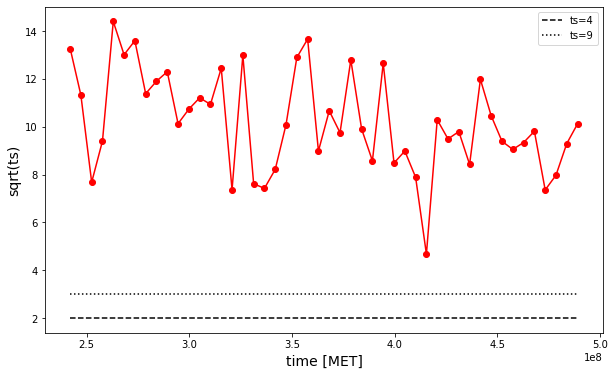

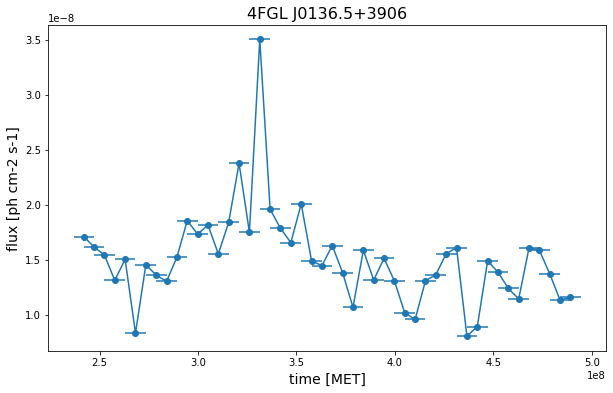

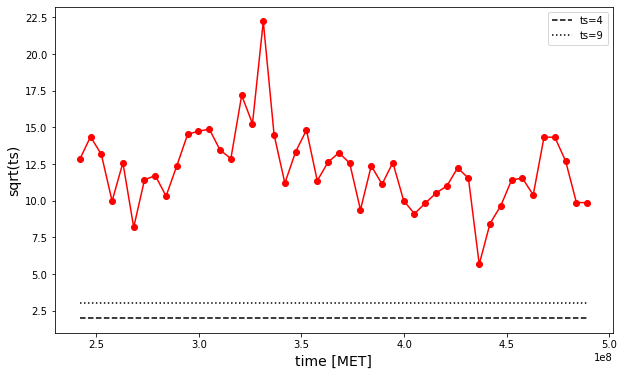

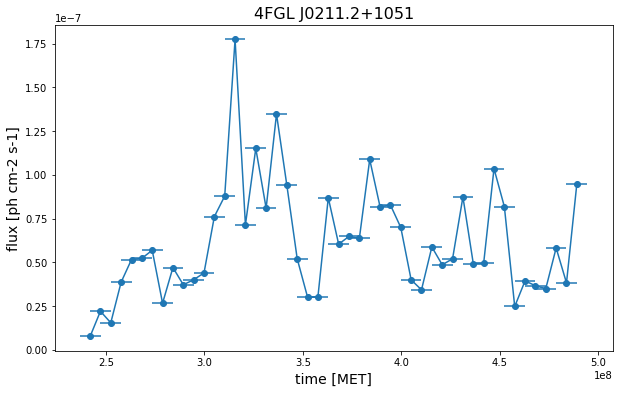

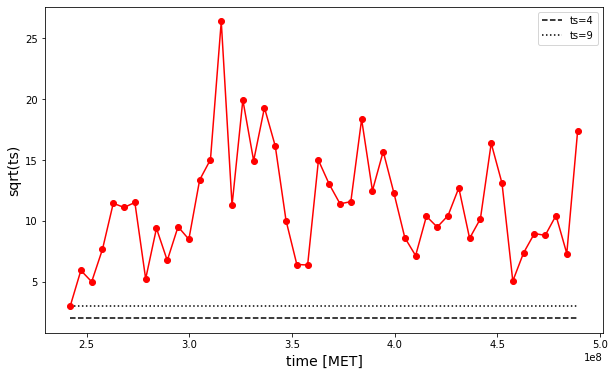

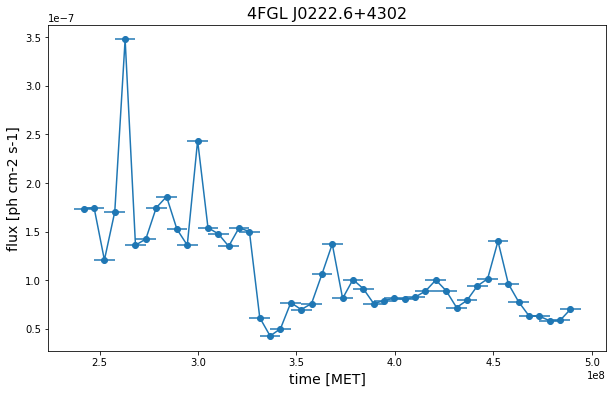

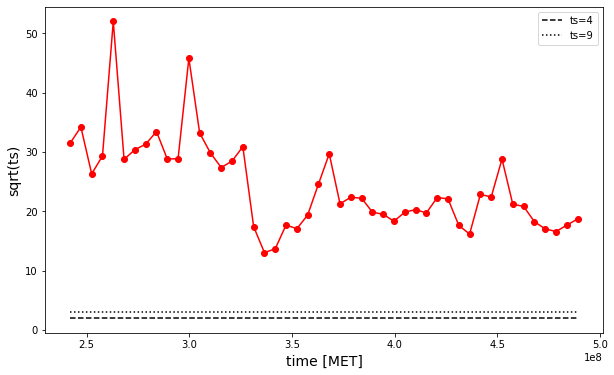

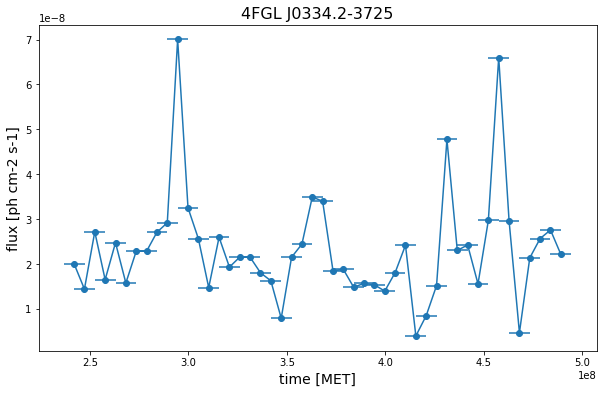

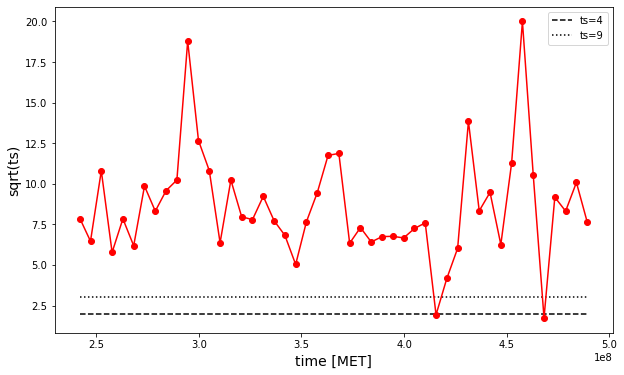

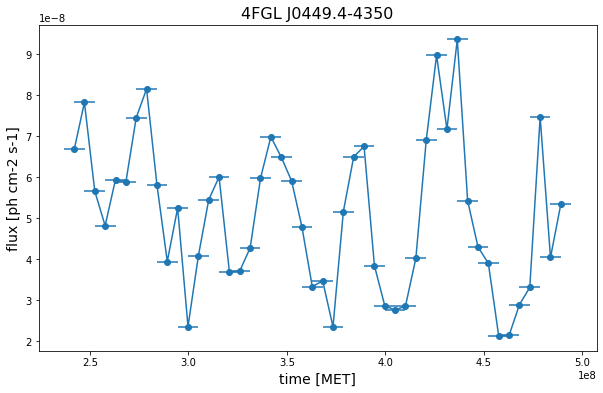

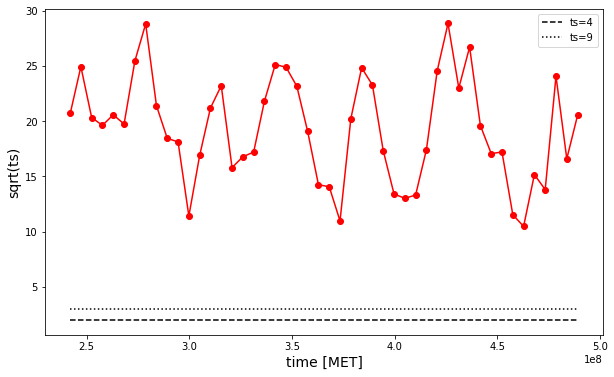

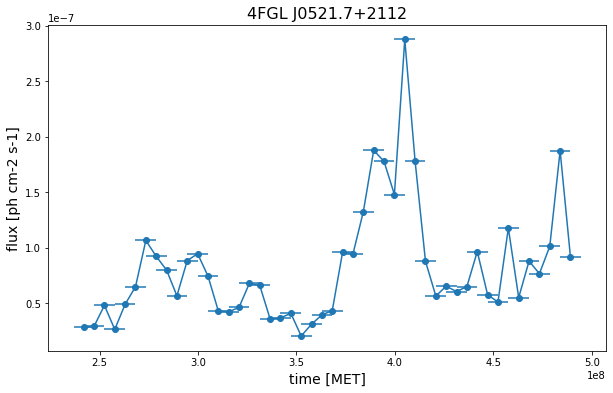

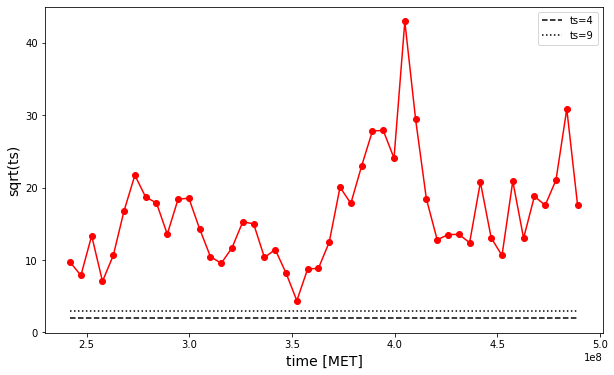

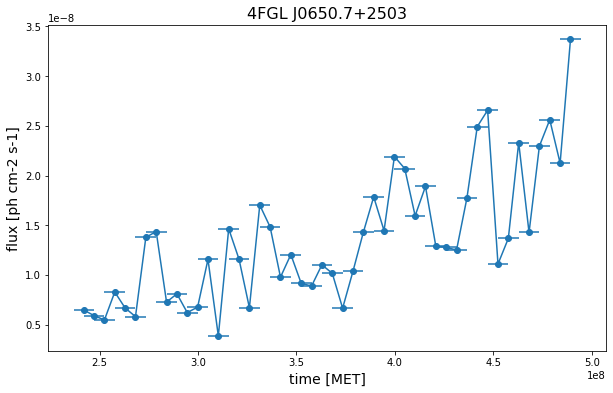

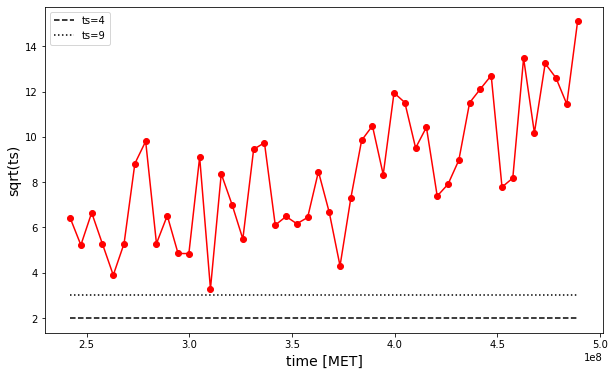

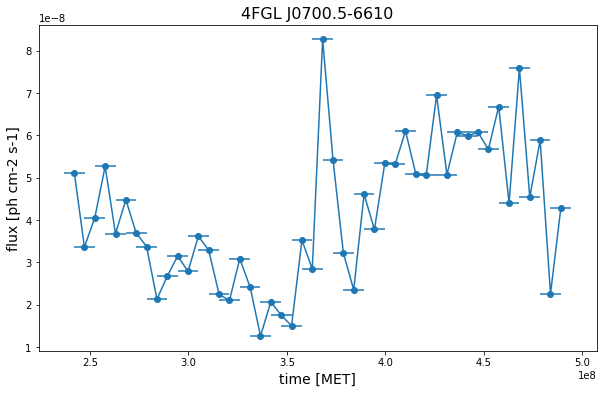

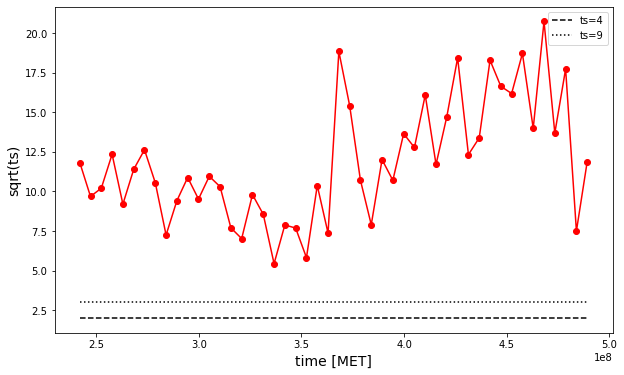

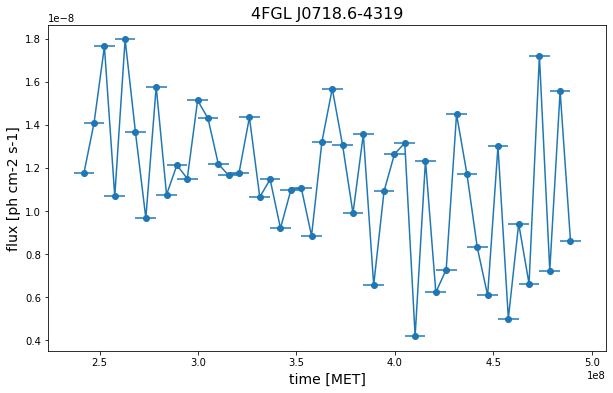

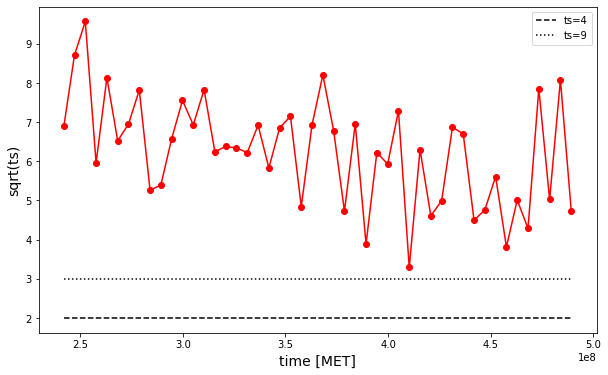

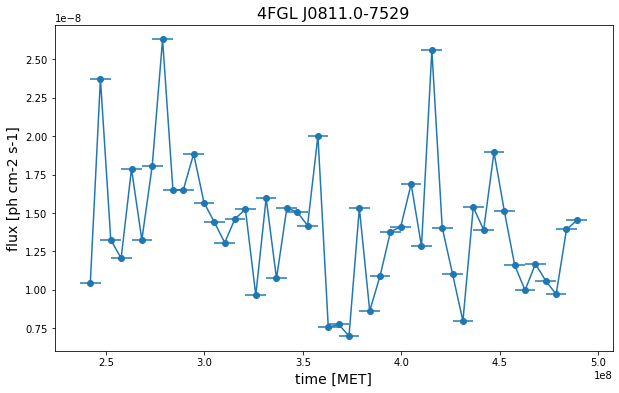

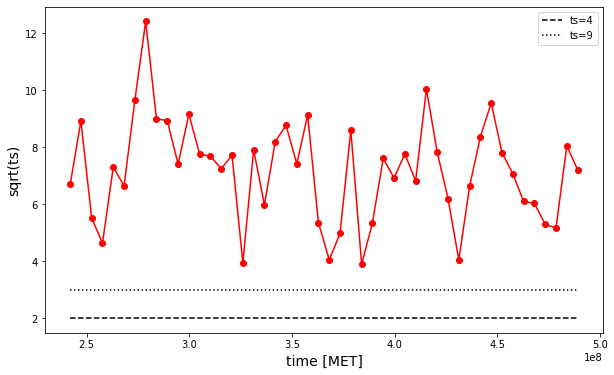

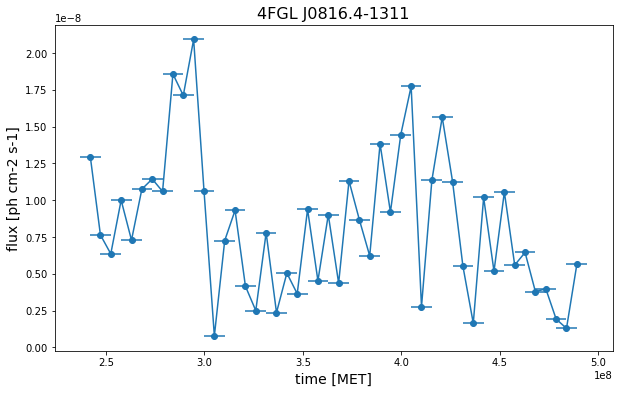

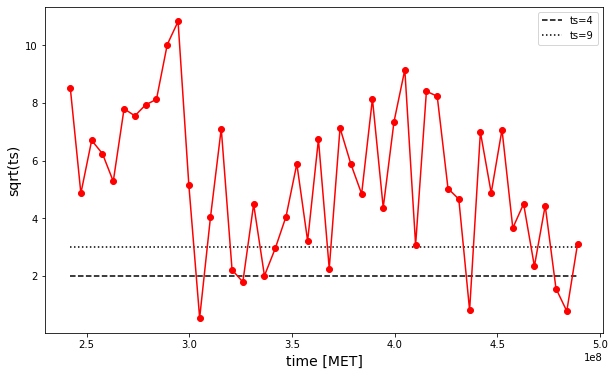

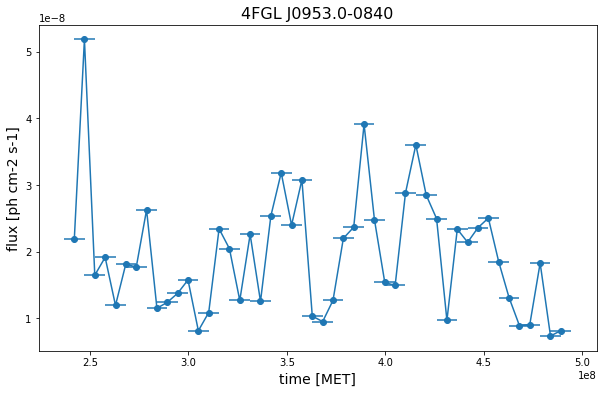

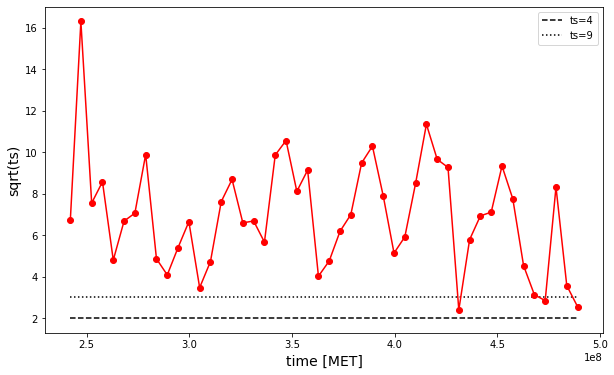

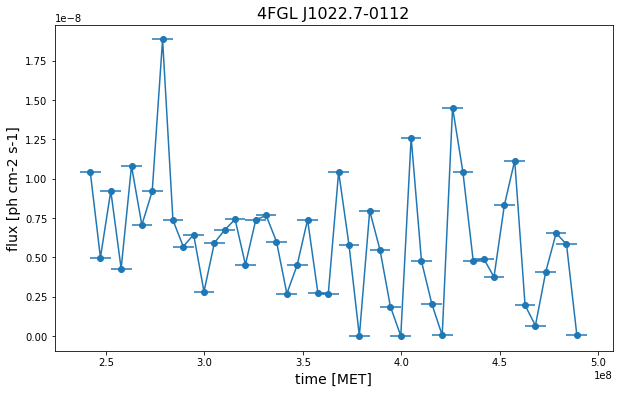

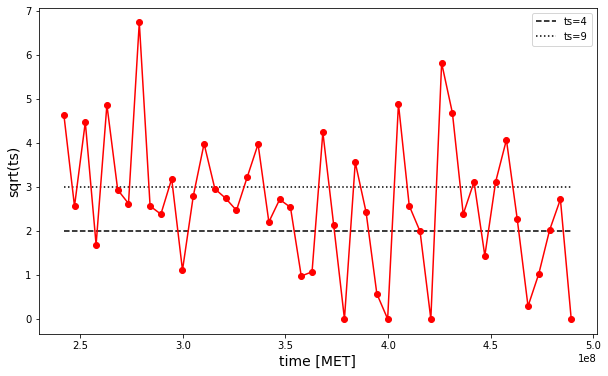

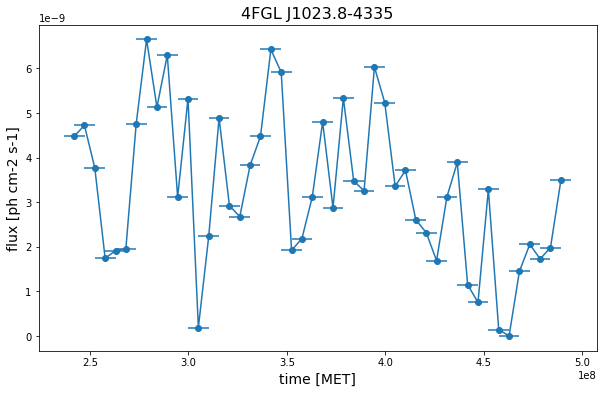

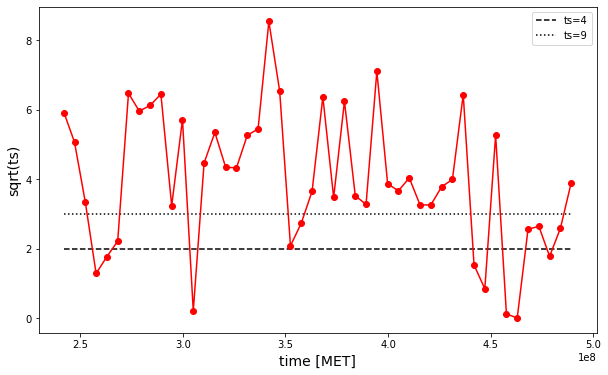

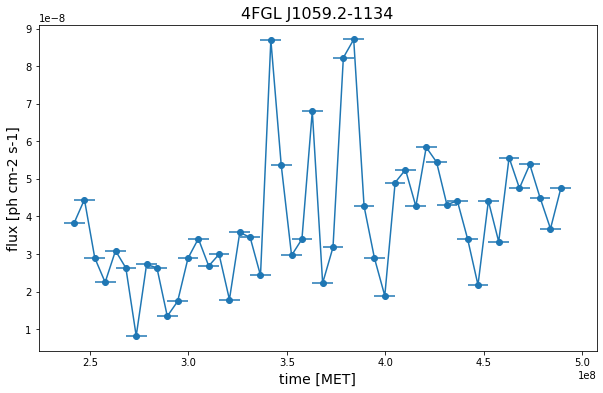

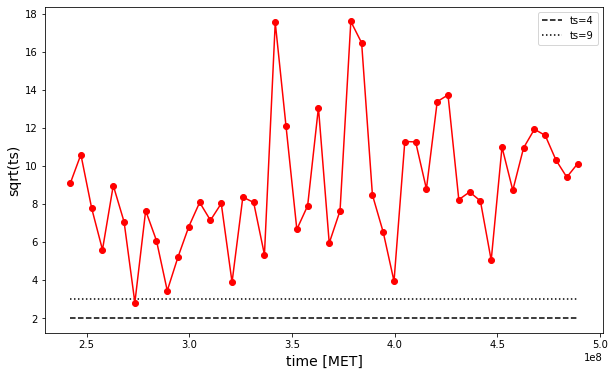

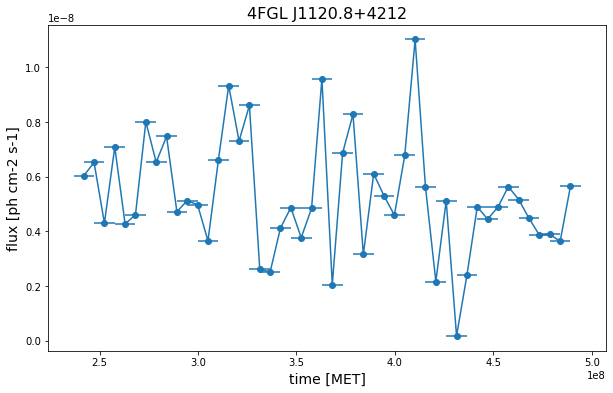

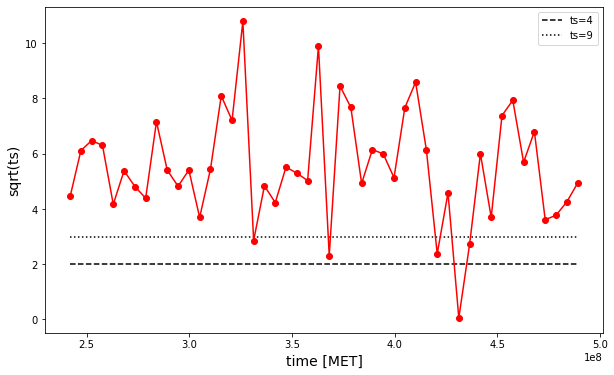

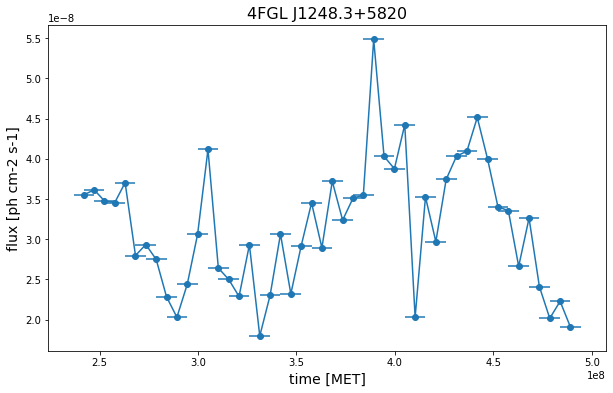

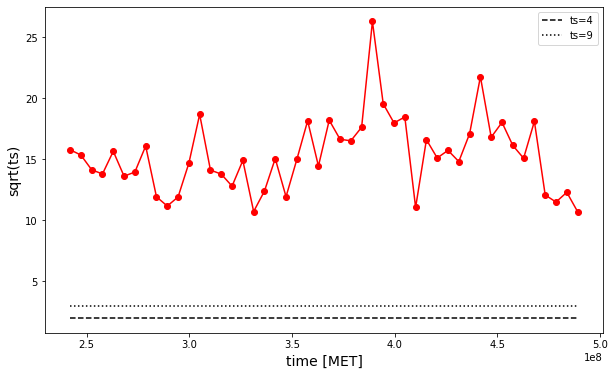

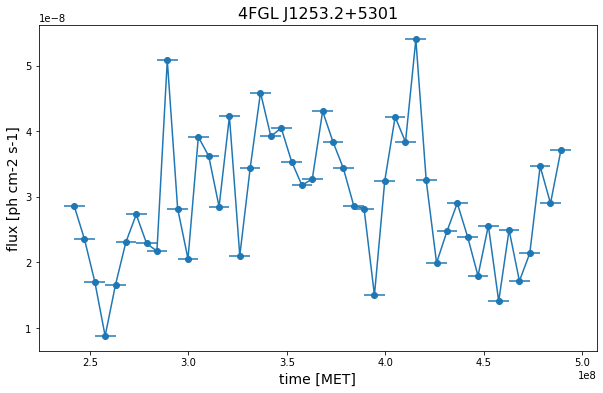

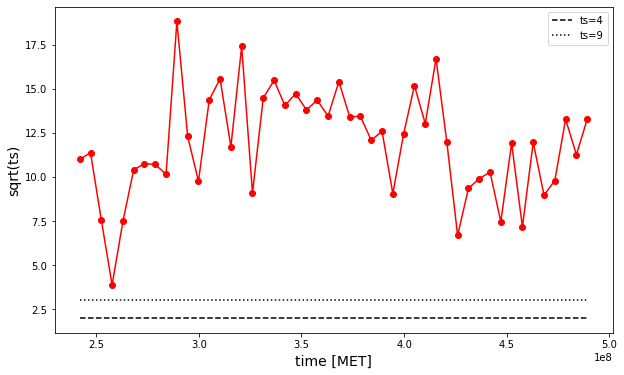

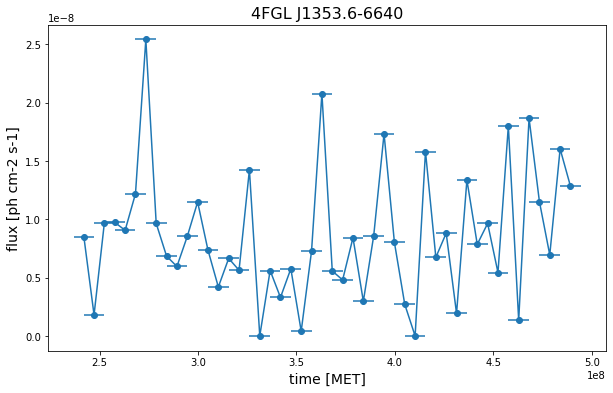

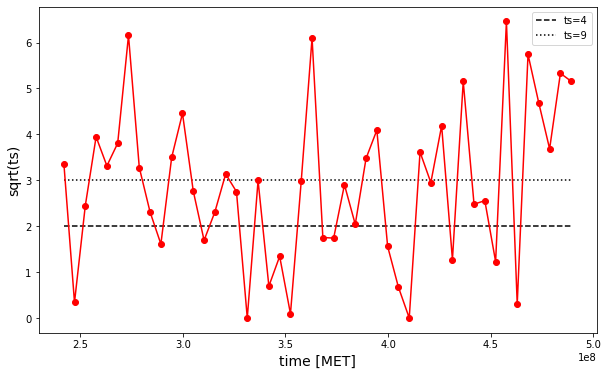

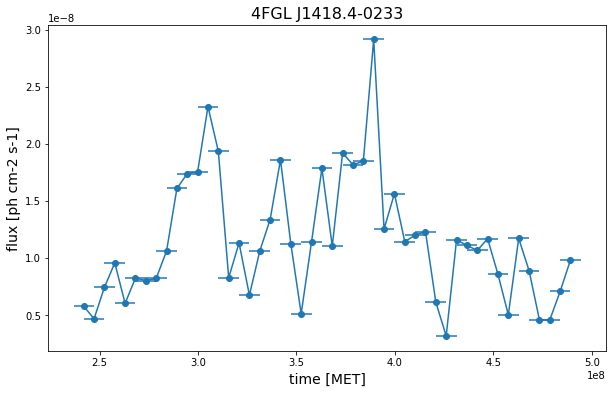

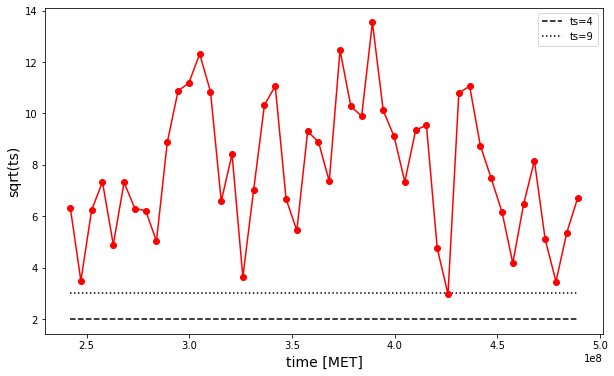

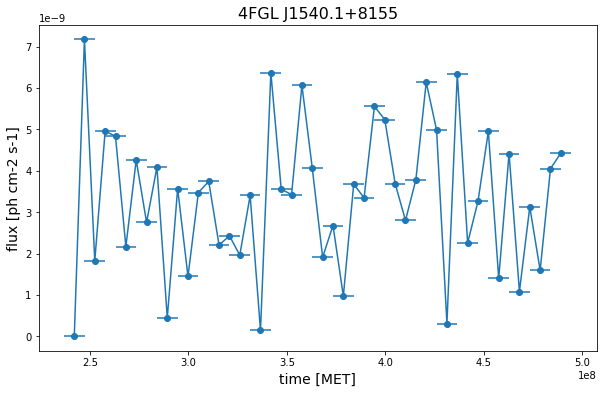

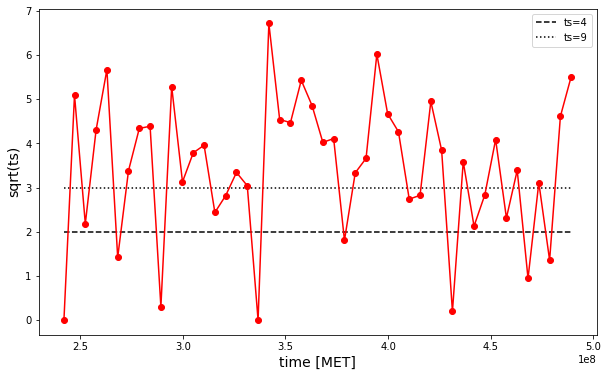

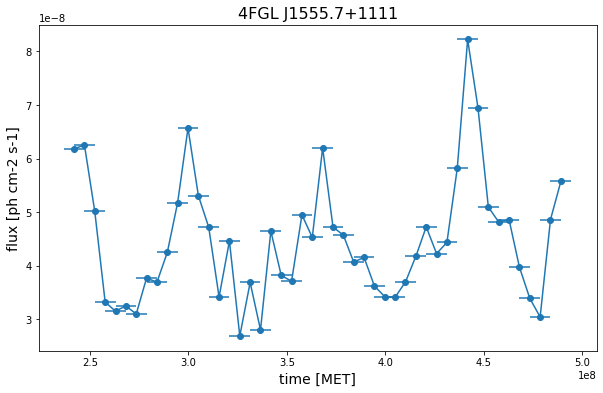

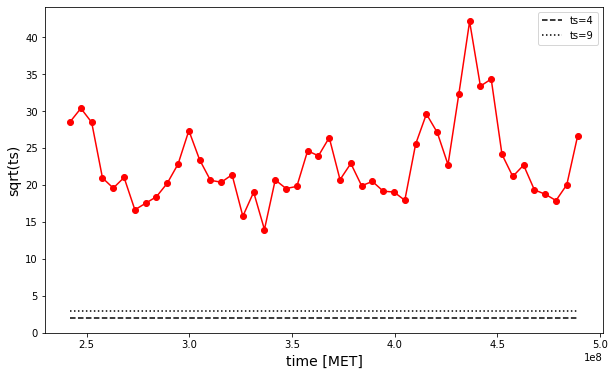

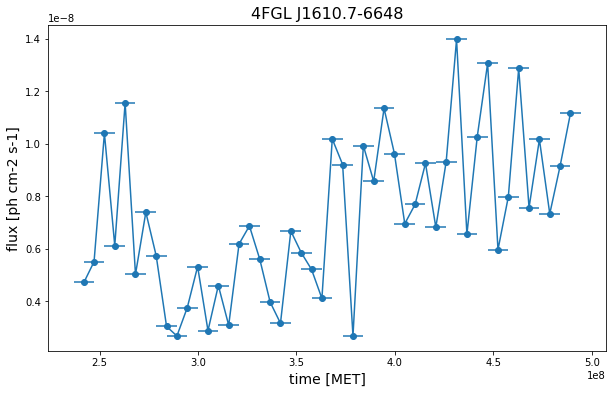

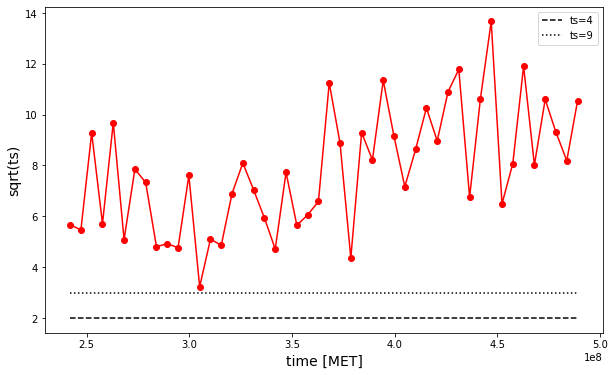

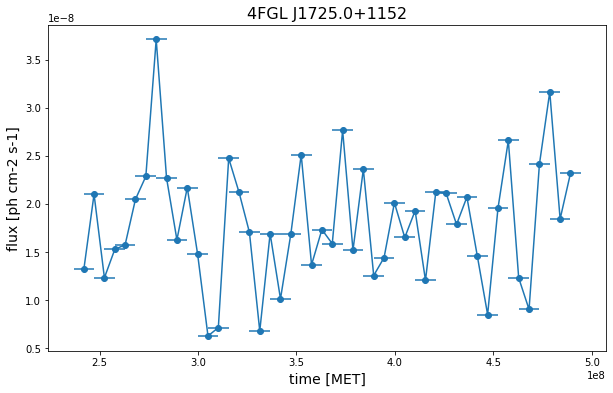

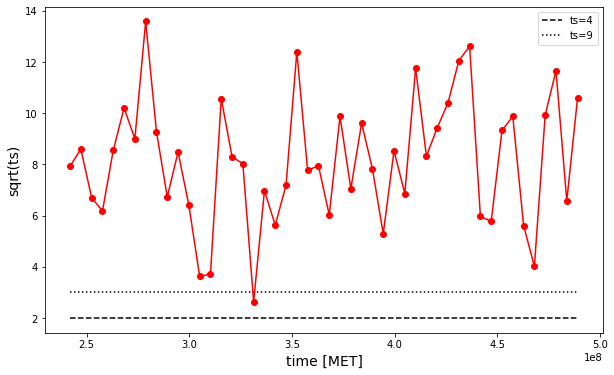

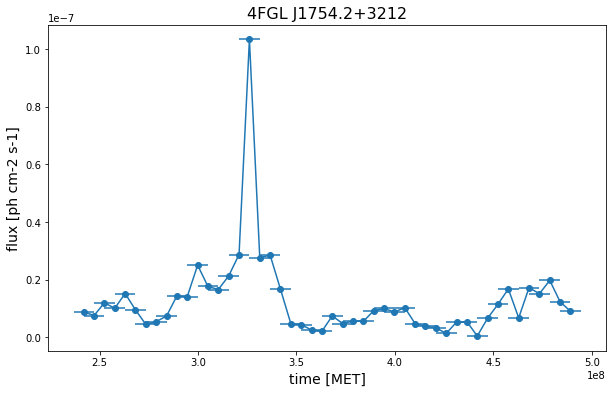

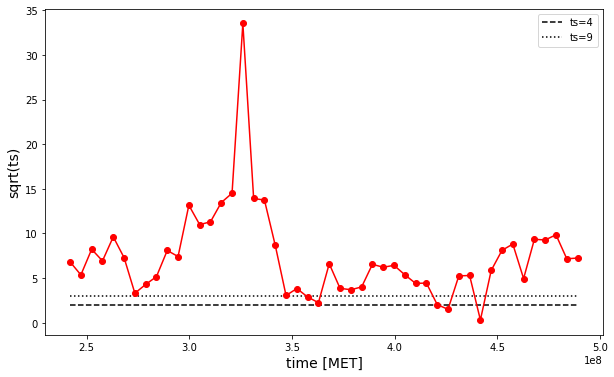

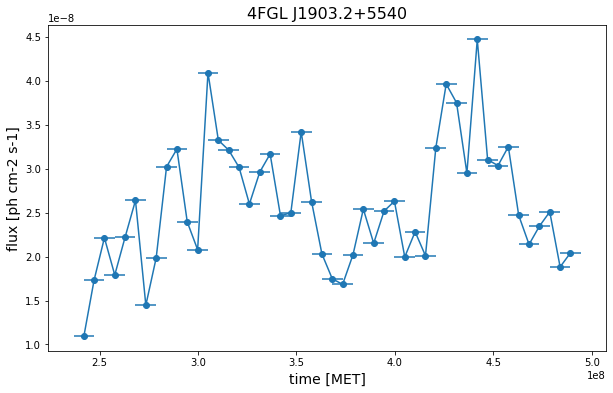

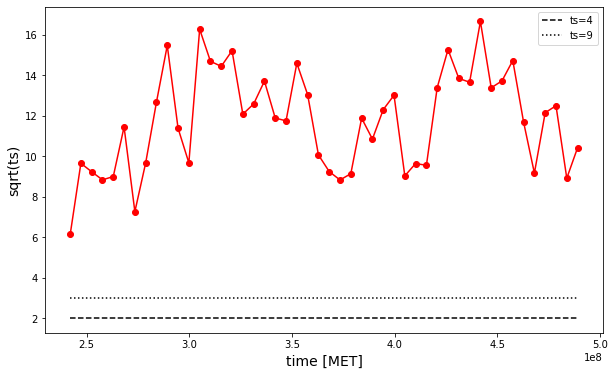

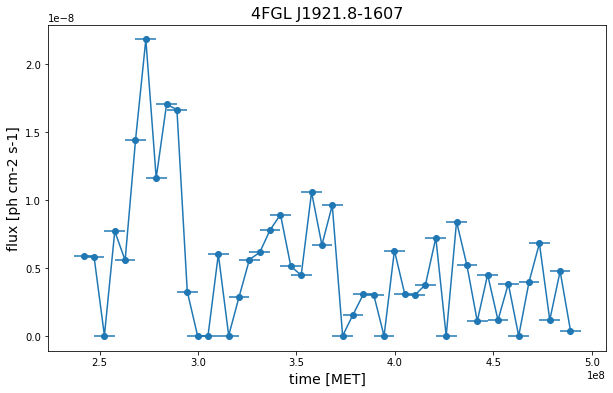

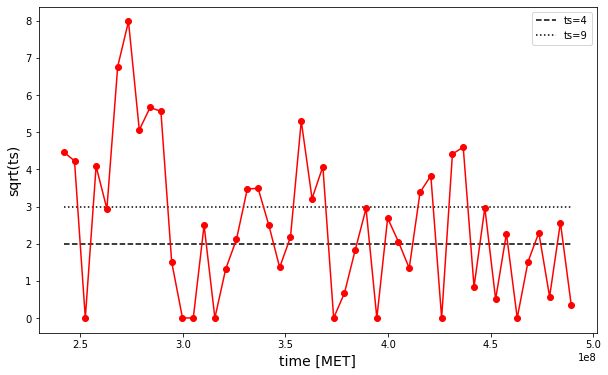

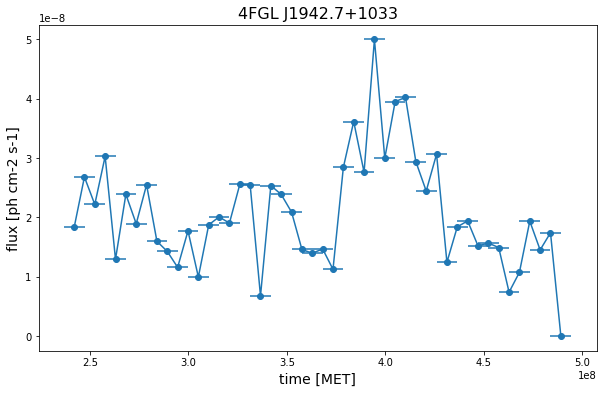

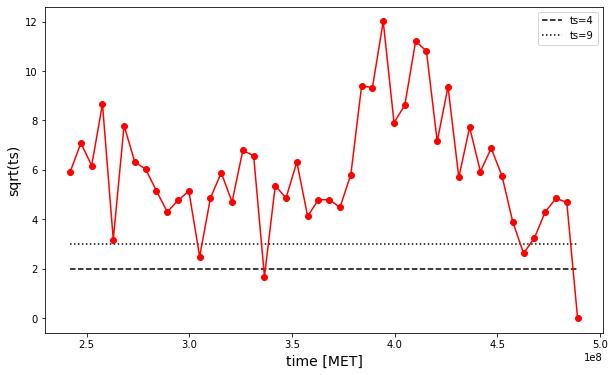

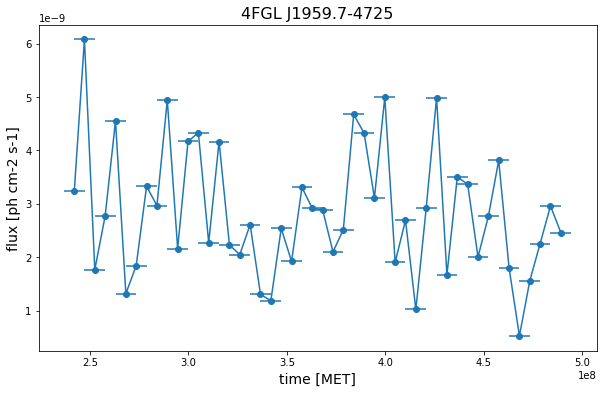

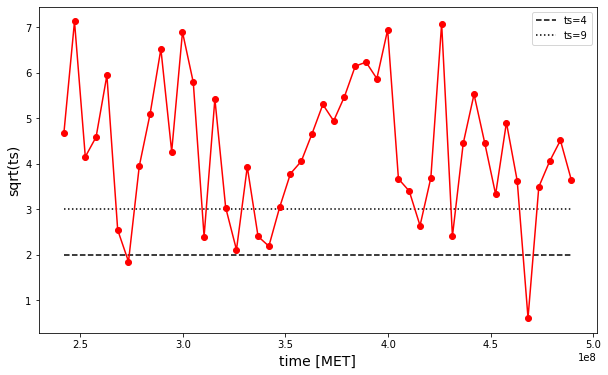

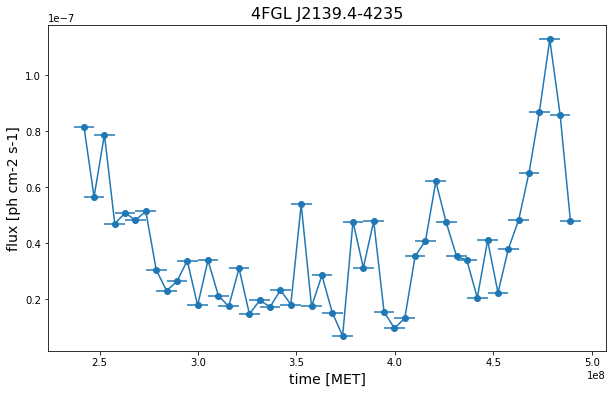

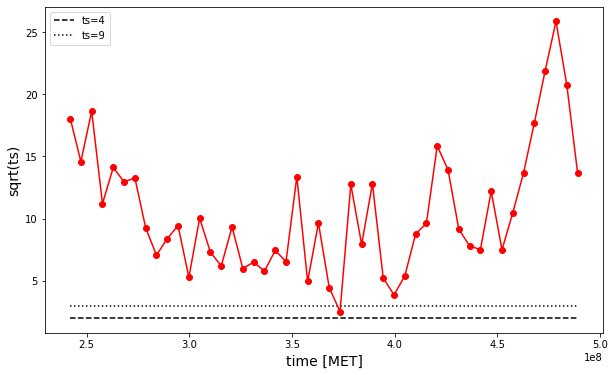

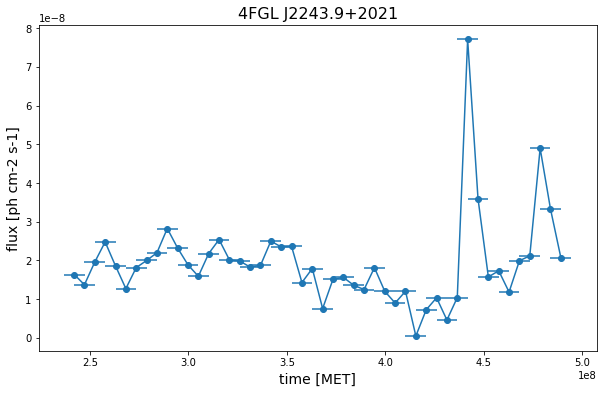

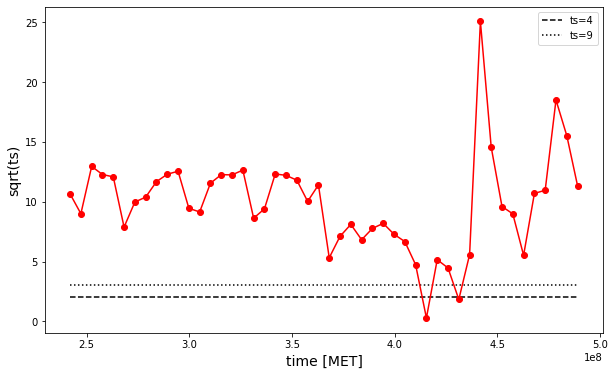

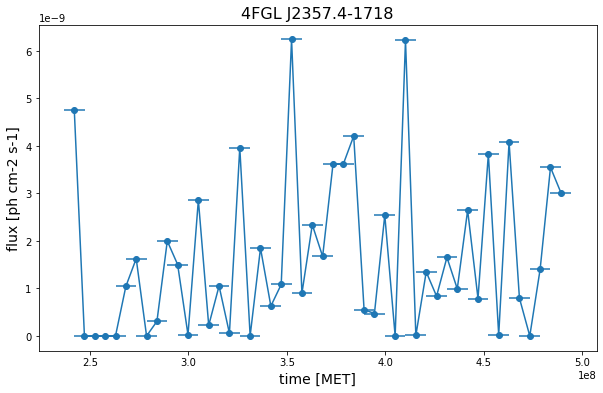

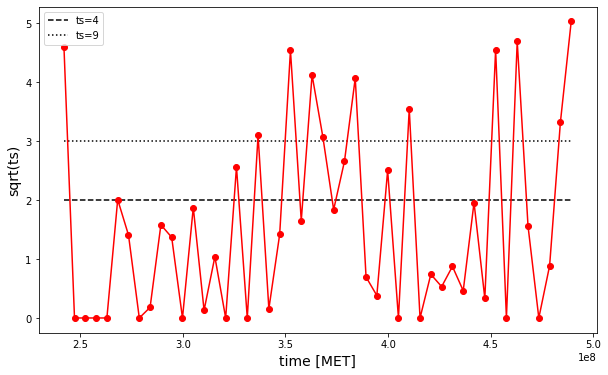

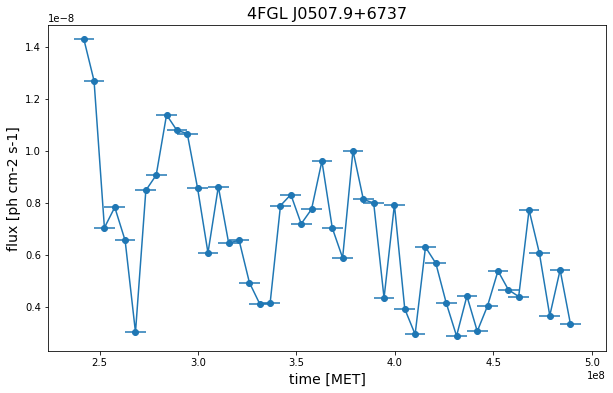

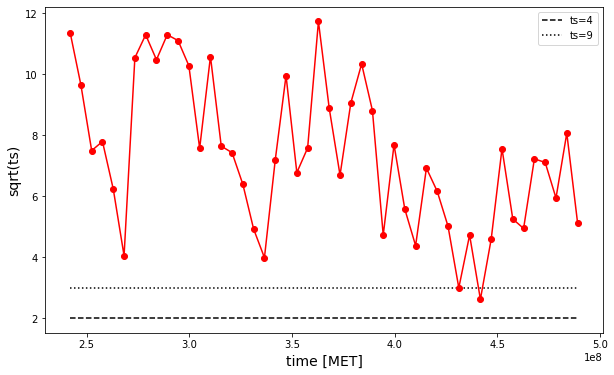

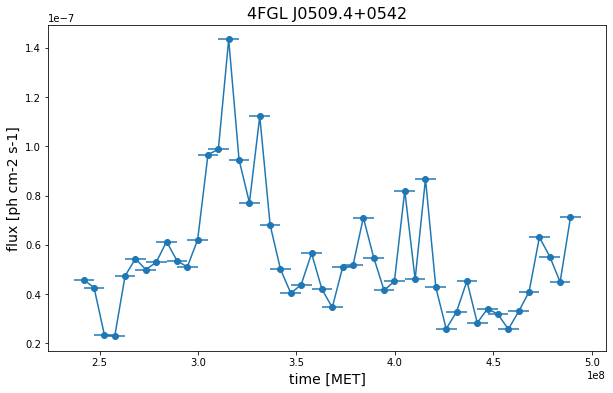

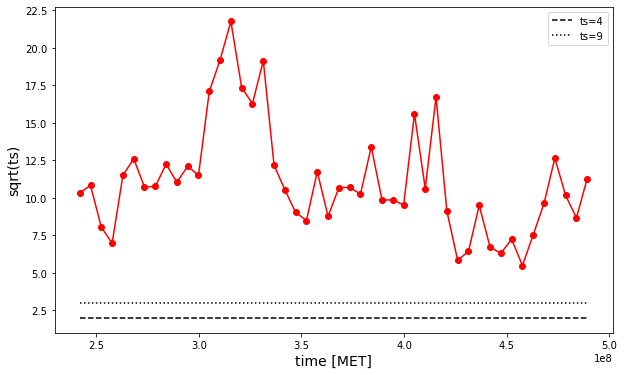

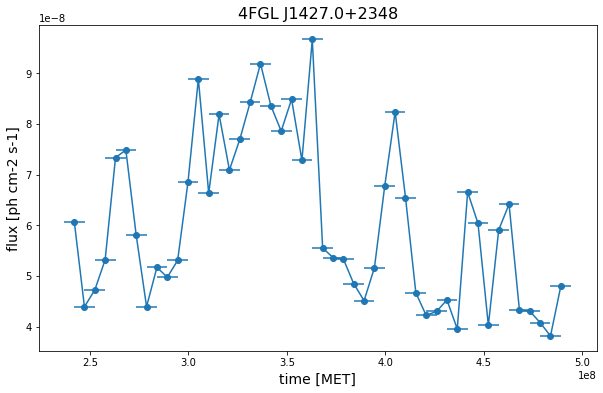

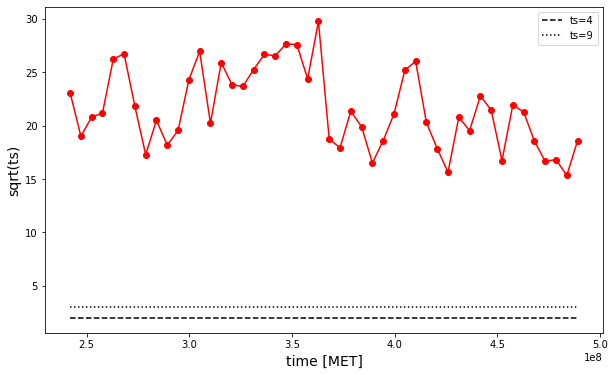

In [53]:
#Graficamos las cruvas de luz de las fuentes a monitorear +  el TS 
for i in range(len(fluxes[indexs])):
    plt.figure(figsize=(10,6))
    plt.errorbar(tmean, fluxes[indexs][i], xerr=5260000.0, marker="o") #yerr=fluxes_e[indexs][i][1],marker='o' )
    plt.xlabel("time [MET]", fontsize=14)
    plt.ylabel("flux [ph cm-2 s-1]", fontsize=14)
    plt.title(names_fgl[indexs][i] ,fontsize=16)
    plt.show()
    #TS
    plt.figure(figsize=(10,6))
    plt.plot(tmean, ts[indexs][i], marker='o', color="red")
    plt.hlines(2, xmin=np.min(tmean), xmax=np.max(tmean), label="ts=4", linestyle="--", color="k")
    plt.hlines(3, xmin=np.min(tmean), xmax=np.max(tmean), label="ts=9", linestyle="dotted", color="k")
    plt.legend()
    plt.xlabel("time [MET]", fontsize=14)
    plt.ylabel("sqrt(ts)", fontsize=14)
    plt.show()

## Instalacion Fermipy <a class="anchor" id="instalacion"></a>

Para instalar fermipy primero debemos instalar Anaconda, cualquier version para Python3 que sea creada en 2020 02 o antes nos sirve, para esto podemos seguir los pasos de este link https://docs.anaconda.com/anaconda/install/index.html, y para bajar versiones anteriores revisar este archive https://repo.anaconda.com/archive/.

Una vez instalado Anaconda debemos activar el ambiente de anconda con un el siguiente comando $source anaconda3/bin/activate.

Una vez en el ambiente de Anaconda hay que revisar la version de conda, si esta es mayor a 4.10.0, hay que hacer un downgrade con el comando $conda install conda=4.10.0

Ahora podemos instalar Fermipy con las siguientes lineas:

$conda create --name fermipy -c conda-forge -c fermi python=3.7 fermitools=2.0.8


$conda install --name fermipy -c conda-forge fermipy

Una vez instalado Fermipy podemos empezar este ambiente (para esto primero debemos estar en el ambiendo de conda), con $conda activate fermipy.

Dentro de este ambiente podemos utilizar la libreria de fermipy (la documentación aca: https://fermipy.readthedocs.io/en/latest/quickstart.html)

*Disclaimer: Esto puede cambiar si se actualiza el paquete de fermipy, La version con la que se hizo este notebook fue 2.0.8*